# loading the necessary libraries and the data from the local directory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)

In [3]:
train_data = pd.read_csv('ml_case_training_data.csv')
train_hist = pd.read_csv('ml_case_training_hist_data.csv')
train_output = pd.read_csv('ml_case_training_output.csv')

In [4]:
train_data.head()

id                      activity_new  \
0  48ada52261e7cf58715202705a0451c9  esoiiifxdlbkcsluxmfuacbdckommixw   
1  24011ae4ebbe3035111d65fa7c15bc57                               NaN   
2  d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3  764c75f661154dac3a6c254cd082ea7d                               NaN   
4  bba03439a292a1e166f80264c16191cb                               NaN   

   campaign_disc_ele                     channel_sales  cons_12m  \
0                NaN  lmkebamcaaclubfxadlmueccxoimlema    309275   
1                NaN  foosdfpfkusacimwkcsosbicdxkicaua         0   
2                NaN                               NaN      4660   
3                NaN  foosdfpfkusacimwkcsosbicdxkicaua       544   
4                NaN  lmkebamcaaclubfxadlmueccxoimlema      1584   

   cons_gas_12m  cons_last_month  date_activ    date_end date_first_activ  \
0             0            10025  2012-11-07  2016-11-06              NaN   
1         54946                0  2013-06-15  2016-06-15              NaN   
2             0                0  2009-08-21  2016-08-30              NaN   
3             0                0  2010-04-16  2016-04-16              NaN   
4             0                0  2010-03-30  2016-03-30              NaN   

  date_modif_prod date_renewal  forecast_base_bill_ele  \
0      2012-11-07   2015-11-09                     NaN   
1             NaN   2015-06-23                     NaN   
2      2009-08-21   2015-08-31                     NaN   
3      2010-04-16   2015-04-17                     NaN   
4      2010-03-30   2015-03-31                     NaN   

   forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                      NaN                NaN            NaN   
1                      NaN                NaN            NaN   
2                      NaN                NaN            NaN   
3                      NaN                NaN            NaN   
4                      NaN                NaN            NaN   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           26520.30               10025                       0.0   
1               0.00                   0                       0.0   
2             189.95                   0                       0.0   
3              47.96                   0                       0.0   
4             240.04                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                     1.78                  0.114481   
2                    16.27                  0.145711   
3                    38.72                  0.165794   
4                    19.83                  0.146694   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.098142              40.606701       t       0.0   
2                  0.000000              44.311378       f       0.0   
3                  0.087899              44.311378       f       0.0   
4                  0.000000              44.311378       f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig                         origin_up  pow_max  
0                3  ldkssxwpmemidmecebumciepifcamkci  180.000  
1                3  lxidpiddsbxsbosboudacockeimpuepw   43.648  
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800  
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856  
4                6  kamkkxfxxuwbdslkwifmmcsi

In [5]:
train_hist.head()

id  price_date  price_p1_var  price_p2_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01      0.151367           0.0   
1  038af19179925da21a25619c5a24b745  2015-02-01      0.151367           0.0   
2  038af19179925da21a25619c5a24b745  2015-03-01      0.151367           0.0   
3  038af19179925da21a25619c5a24b745  2015-04-01      0.149626           0.0   
4  038af19179925da21a25619c5a24b745  2015-05-01      0.149626           0.0   

   price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  
0           0.0     44.266931           0.0           0.0  
1           0.0     44.266931           0.0           0.0  
2           0.0     44.266931           0.0           0.0  
3           0.0     44.266931           0.0           0.0  
4           0.0     44.266931           0.0           0.0

train_output.head()

In [6]:
train_hist_bymean = train_hist.groupby('id').mean()

In [7]:
train_hist_bymean.head()

price_p1_var  price_p2_var  price_p3_var  \
id                                                                           
0002203ffbb812588b632b9e628cc38d      0.124338      0.103794      0.073160   
0004351ebdd665e6ee664792efc4fd13      0.146426      0.000000      0.000000   
0010bcc39e42b3c2131ed2ce55246e3c      0.181558      0.000000      0.000000   
0010ee3855fdea87602a5b7aba8e42de      0.118757      0.098292      0.069032   
00114d74e963e47177db89bc70108537      0.147926      0.000000      0.000000   

                                  price_p1_fix  price_p2_fix  price_p3_fix  
id                                                                          
0002203ffbb812588b632b9e628cc38d     40.701732     24.421038     16.280694  
0004351ebdd665e6ee664792efc4fd13     44.385450      0.000000      0.000000  
0010bcc39e42b3c2131ed2ce55246e3c     45.319710      0.000000      0.000000  
0010ee3855fdea87602a5b7aba8e42de     40.647427     24.388455     16.258971  
00114d74e963e47177db89bc70108537     44.266930      0.000000      0.000000

In [8]:
# merge all the three datas; training_data, training_hist_data, training_output
data = pd.merge(train_data, train_hist_bymean, on = 'id')
data = pd.merge(data, train_output, on = 'id')

# inpecting the data for missing values, outliers and useless columns

In [9]:
data.head()

id                      activity_new  \
0  48ada52261e7cf58715202705a0451c9  esoiiifxdlbkcsluxmfuacbdckommixw   
1  24011ae4ebbe3035111d65fa7c15bc57                               NaN   
2  d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3  764c75f661154dac3a6c254cd082ea7d                               NaN   
4  bba03439a292a1e166f80264c16191cb                               NaN   

   campaign_disc_ele                     channel_sales  cons_12m  \
0                NaN  lmkebamcaaclubfxadlmueccxoimlema    309275   
1                NaN  foosdfpfkusacimwkcsosbicdxkicaua         0   
2                NaN                               NaN      4660   
3                NaN  foosdfpfkusacimwkcsosbicdxkicaua       544   
4                NaN  lmkebamcaaclubfxadlmueccxoimlema      1584   

   cons_gas_12m  cons_last_month  date_activ    date_end date_first_activ  \
0             0            10025  2012-11-07  2016-11-06              NaN   
1         54946                0  2013-06-15  2016-06-15              NaN   
2             0                0  2009-08-21  2016-08-30              NaN   
3             0                0  2010-04-16  2016-04-16              NaN   
4             0                0  2010-03-30  2016-03-30              NaN   

  date_modif_prod date_renewal  forecast_base_bill_ele  \
0      2012-11-07   2015-11-09                     NaN   
1             NaN   2015-06-23                     NaN   
2      2009-08-21   2015-08-31                     NaN   
3      2010-04-16   2015-04-17                     NaN   
4      2010-03-30   2015-03-31                     NaN   

   forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                      NaN                NaN            NaN   
1                      NaN                NaN            NaN   
2                      NaN                NaN            NaN   
3                      NaN                NaN            NaN   
4                      NaN                NaN            NaN   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           26520.30               10025                       0.0   
1               0.00                   0                       0.0   
2             189.95                   0                       0.0   
3              47.96                   0                       0.0   
4             240.04                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                     1.78                  0.114481   
2                    16.27                  0.145711   
3                    38.72                  0.165794   
4                    19.83                  0.146694   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.098142              40.606701       t       0.0   
2                  0.000000              44.311378       f       0.0   
3                  0.087899              44.311378       f       0.0   
4                  0.000000              44.311378       f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig                         origin_up  pow_max  price_p1_var  \
0                3  ldkssxwpmemidmecebumciepifcamkci  180.000      0.103449   
1                3  lxidpiddsbxsbosboudacockeimpuepw   43.648      0.122856   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0.149934   
3                6  kamkkxfxxuwbdslkwifmmcsiusiu

In [10]:
data.describe()

campaign_disc_ele      cons_12m  cons_gas_12m  cons_last_month  \
count                0.0  1.609600e+04  1.609600e+04     1.609600e+04   
mean                 NaN  1.948044e+05  3.191164e+04     1.946154e+04   
std                  NaN  6.795151e+05  1.775885e+05     8.235676e+04   
min                  NaN -1.252760e+05 -3.037000e+03    -9.138600e+04   
25%                  NaN  5.906250e+03  0.000000e+00     0.000000e+00   
50%                  NaN  1.533250e+04  0.000000e+00     9.010000e+02   
75%                  NaN  5.022150e+04  0.000000e+00     4.127000e+03   
max                  NaN  1.609711e+07  4.188440e+06     4.538720e+06   

       forecast_base_bill_ele  forecast_base_bill_year  forecast_bill_12m  \
count             3508.000000              3508.000000        3508.000000   
mean               335.843857               335.843857        3837.441866   
std                649.406000               649.406000        5425.744327   
min               -364.940000              -364.940000       -2503.480000   
25%                  0.000000                 0.000000        1158.175000   
50%                162.955000               162.955000        2187.230000   
75%                396.185000               396.185000        4246.555000   
max              12566.080000             12566.080000       81122.630000   

       forecast_cons  forecast_cons_12m  forecast_cons_year  \
count    3508.000000       16096.000000        16096.000000   
mean      206.845165        2370.555949         1907.347229   
std       455.634288        4035.085664         5257.364759   
min         0.000000      -16689.260000       -85627.000000   
25%         0.000000         513.230000            0.000000   
50%        42.215000        1179.160000          378.000000   
75%       228.117500        2692.077500         1994.250000   
max      9682.890000      103801.930000       175375.000000   

       forecast_discount_energy  forecast_meter_rent_12m  \
count              15970.000000             16096.000000   
mean                   0.991547                70.309945   
std                    5.160969                79.023251   
min                    0.000000              -242.960000   
25%                    0.000000                16.230000   
50%                    0.000000                19.440000   
75%                    0.000000               131.470000   
max                   50.000000              2411.690000   

       forecast_price_energy_p1  forecast_price_energy_p2  \
count              15970.000000              15970.000000   
mean                   0.135901                  0.052951   
std                    0.026252                  0.048617   
min                    0.000000                  0.000000   
25%                    0.115237                  0.000000   
50%                    0.142881                  0.086163   
75%                    0.146348                  0.098837   
max                    0.273963                  0.195975   

       forecast_price_pow_p1      imp_cons  margin_gross_pow_ele  \
count           15970.000000  16096.000000          16083.000000   
mean               43.533496    196.123447             22.462276   
std                 5.212252    494.366979             23.700883   
min                -0.122184  -9038.210000           -525.540000   
25%                40.606701      0.000000             11.960000   
50%                44.311378     44.465000             21.090000   
75%                44.311378    218.090000             29.640000   
max                59.444710  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        16083.000000  16096.000000  16081.000000     16096.000000   
mean            21.460318      1.347788    217.987028         5.030629   
std             27.917349      1.459808    366.742030         1.676101   
min           -615.660000      1.000000  -4148.990000         1.000000   
25%          

In [11]:
data.describe(include=np.object)

id                      activity_new  \
count                              16096                              6551   
unique                             16096                               419   
top     22d2a2d9168ce246fc18b229276fdcc6  apdekpcbwosbxepsfxclislboipuxpop   
freq                                   1                              1577   

                           channel_sales  date_activ    date_end  \
count                              11878       16096       16094   
unique                                 7        1961         371   
top     foosdfpfkusacimwkcsosbicdxkicaua  2009-08-01  2016-02-01   
freq                                7377          99         152   

       date_first_activ date_modif_prod date_renewal has_gas  \
count              3508           15939        16056   16096   
unique             1133            2307          398       2   
top          2009-07-14      2015-11-01   2015-06-23       f   
freq                 34             592          637   13132   

                               origin_up  
count                              16009  
unique                                 5  
top     lxidpiddsbxsbosboudacockeimpuepw  
freq                                7825

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [13]:
# Checking for missing values
data.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [14]:
# Columns that are considered irrelevant to the analysis given that most of their values are missing
drop_column = ['campaign_disc_ele', 'activity_new', 
               'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 
              'forecast_bill_12m', 'forecast_cons']
data_clean = data.drop(drop_column, 1)
data_clean.set_index(keys = 'id', inplace = True)
data_clean.head()

channel_sales  cons_12m  \
id                                                                             
48ada52261e7cf58715202705a0451c9  lmkebamcaaclubfxadlmueccxoimlema    309275   
24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua         0   
d29c2c54acc38ff3c0614d0a653813dd                               NaN      4660   
764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua       544   
bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema      1584   

                                  cons_gas_12m  cons_last_month  date_activ  \
id                                                                            
48ada52261e7cf58715202705a0451c9             0            10025  2012-11-07   
24011ae4ebbe3035111d65fa7c15bc57         54946                0  2013-06-15   
d29c2c54acc38ff3c0614d0a653813dd             0                0  2009-08-21   
764c75f661154dac3a6c254cd082ea7d             0                0  2010-04-16   
bba03439a292a1e166f80264c16191cb             0                0  2010-03-30   

                                    date_end date_modif_prod date_renewal  \
id                                                                          
48ada52261e7cf58715202705a0451c9  2016-11-06      2012-11-07   2015-11-09   
24011ae4ebbe3035111d65fa7c15bc57  2016-06-15             NaN   2015-06-23   
d29c2c54acc38ff3c0614d0a653813dd  2016-08-30      2009-08-21   2015-08-31   
764c75f661154dac3a6c254cd082ea7d  2016-04-16      2010-04-16   2015-04-17   
bba03439a292a1e166f80264c16191cb  2016-03-30      2010-03-30   2015-03-31   

                                  forecast_cons_12m  forecast_cons_year  \
id                                                                        
48ada52261e7cf58715202705a0451c9           26520.30               10025   
24011ae4ebbe3035111d65fa7c15bc57               0.00                   0   
d29c2c54acc38ff3c0614d0a653813dd             189.95                   0   
764c75f661154dac3a6c254cd082ea7d              47.96                   0   
bba03439a292a1e166f80264c16191cb             240.04                   0   

                                  forecast_discount_energy  \
id                                                           
48ada52261e7cf58715202705a0451c9                       0.0   
24011ae4ebbe3035111d65fa7c15bc57                       0.0   
d29c2c54acc38ff3c0614d0a653813dd                       0.0   
764c75f661154dac3a6c254cd082ea7d                       0.0   
bba03439a292a1e166f80264c16191cb                       0.0   

                                  forecast_meter_rent_12m  \
id                                                          
48ada52261e7cf58715202705a0451c9                   359.29   
24011ae4ebbe3035111d65fa7c15bc57                     1.78   
d29c2c54acc38ff3c0614d0a653813dd                    16.27   
764c75f661154dac3a6c254cd082ea7d                    38.72   
bba03439a292a1e166f80264c16191cb                    19.83   

                                  forecast_price_energy_p1  \
id                                                           
48ada52261e7cf58715202705a0451c9                  0.095919   
24011ae4ebbe3035111d65fa7c15bc57                  0.114481   
d29c2c54acc38ff3c0614d0a653813dd                  0.145711   
764c75f661154dac3a6c254cd082ea7d                  0.165794   
bba03439a292a1e166f80264c16191cb                  0.146694   

                                  forecast_price_energy_p2  \
id                                                           
48ada52261e7cf58715202705a0451c9                  0.088347   
24011ae4ebbe3035111d65fa7c15bc57                  0.098142   
d29c2c54acc38ff3c0614d0a653813dd                  0.000000   
764c75f661154dac3a6c254cd082ea7d                  0.087899   
bba03439a292a1e166f80264c16191cb                  0.000000   

                                  forecast_price_pow_p1 has_gas  imp_cons  \
id                                                            

In [15]:
# Differenting the categorical data type from the numberical data type and help inspect the cleaning process
data_clean_object = data_clean.select_dtypes(exclude=np.number)
data_clean_num = data_clean.select_dtypes(include= np.number)

In [16]:
data_clean_object.head()

channel_sales  \
id                                                                   
48ada52261e7cf58715202705a0451c9  lmkebamcaaclubfxadlmueccxoimlema   
24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
d29c2c54acc38ff3c0614d0a653813dd                               NaN   
764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   

                                  date_activ    date_end date_modif_prod  \
id                                                                         
48ada52261e7cf58715202705a0451c9  2012-11-07  2016-11-06      2012-11-07   
24011ae4ebbe3035111d65fa7c15bc57  2013-06-15  2016-06-15             NaN   
d29c2c54acc38ff3c0614d0a653813dd  2009-08-21  2016-08-30      2009-08-21   
764c75f661154dac3a6c254cd082ea7d  2010-04-16  2016-04-16      2010-04-16   
bba03439a292a1e166f80264c16191cb  2010-03-30  2016-03-30      2010-03-30   

                                 date_renewal has_gas  \
id                                                      
48ada52261e7cf58715202705a0451c9   2015-11-09       f   
24011ae4ebbe3035111d65fa7c15bc57   2015-06-23       t   
d29c2c54acc38ff3c0614d0a653813dd   2015-08-31       f   
764c75f661154dac3a6c254cd082ea7d   2015-04-17       f   
bba03439a292a1e166f80264c16191cb   2015-03-31       f   

                                                         origin_up  
id                                                                  
48ada52261e7cf58715202705a0451c9  ldkssxwpmemidmecebumciepifcamkci  
24011ae4ebbe3035111d65fa7c15bc57  lxidpiddsbxsbosboudacockeimpuepw  
d29c2c54acc38ff3c0614d0a653813dd  kamkkxfxxuwbdslkwifmmcsiusiuosws  
764c75f661154dac3a6c254cd082ea7d  kamkkxfxxuwbdslkwifmmcsiusiuosws  
bba03439a292a1e166f80264c16191cb  kamkkxfxxuwbdslkwifmmcsiusiuosws

In [17]:
data_clean_num.head()

cons_12m  cons_gas_12m  cons_last_month  \
id                                                                          
48ada52261e7cf58715202705a0451c9    309275             0            10025   
24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
764c75f661154dac3a6c254cd082ea7d       544             0                0   
bba03439a292a1e166f80264c16191cb      1584             0                0   

                                  forecast_cons_12m  forecast_cons_year  \
id                                                                        
48ada52261e7cf58715202705a0451c9           26520.30               10025   
24011ae4ebbe3035111d65fa7c15bc57               0.00                   0   
d29c2c54acc38ff3c0614d0a653813dd             189.95                   0   
764c75f661154dac3a6c254cd082ea7d              47.96                   0   
bba03439a292a1e166f80264c16191cb             240.04                   0   

                                  forecast_discount_energy  \
id                                                           
48ada52261e7cf58715202705a0451c9                       0.0   
24011ae4ebbe3035111d65fa7c15bc57                       0.0   
d29c2c54acc38ff3c0614d0a653813dd                       0.0   
764c75f661154dac3a6c254cd082ea7d                       0.0   
bba03439a292a1e166f80264c16191cb                       0.0   

                                  forecast_meter_rent_12m  \
id                                                          
48ada52261e7cf58715202705a0451c9                   359.29   
24011ae4ebbe3035111d65fa7c15bc57                     1.78   
d29c2c54acc38ff3c0614d0a653813dd                    16.27   
764c75f661154dac3a6c254cd082ea7d                    38.72   
bba03439a292a1e166f80264c16191cb                    19.83   

                                  forecast_price_energy_p1  \
id                                                           
48ada52261e7cf58715202705a0451c9                  0.095919   
24011ae4ebbe3035111d65fa7c15bc57                  0.114481   
d29c2c54acc38ff3c0614d0a653813dd                  0.145711   
764c75f661154dac3a6c254cd082ea7d                  0.165794   
bba03439a292a1e166f80264c16191cb                  0.146694   

                                  forecast_price_energy_p2  \
id                                                           
48ada52261e7cf58715202705a0451c9                  0.088347   
24011ae4ebbe3035111d65fa7c15bc57                  0.098142   
d29c2c54acc38ff3c0614d0a653813dd                  0.000000   
764c75f661154dac3a6c254cd082ea7d                  0.087899   
bba03439a292a1e166f80264c16191cb                  0.000000   

                                  forecast_price_pow_p1  imp_cons  \
id                                                                  
48ada52261e7cf58715202705a0451c9              58.995952     831.8   
24011ae4ebbe3035111d65fa7c15bc57              40.606701       0.0   
d29c2c54acc38ff3c0614d0a653813dd              44.311378       0.0   
764c75f661154dac3a6c254cd082ea7d              44.311378       0.0   
bba03439a292a1e166f80264c16191cb              44.311378       0.0   

                                  margin_gross_pow_ele  margin_net_pow_ele  \
id                                                                           
48ada52261e7cf58715202705a0451c9                -41.76              -41.76   
24011ae4ebbe3035111d65fa7c15bc57                 25.44               25.44   
d29c2c54acc38ff3c0614d0a653813dd                 16.38               16.38   
764c75f661154dac3a6c254cd082ea7d                 28.60               28.60   
bba03439a292a1e166f80264c16191cb                 30.22               30.22   

                                  nb_prod_act  net_margin  num_years_antig  \
id                                                                           
48ada52261e7cf58715202705a0451c9            1   

# imputing missing values
    * categorical data where filled with the most frequency value while quantitative features where filled with the median because the mean is influency by outliers
    * datetime data was treated like categorical data as the datetime does not reflect any sequency of event

In [18]:
# Filling categorical datas
data_clean['channel_sales'].fillna(data_clean['channel_sales'].mode().values[0], inplace = True)
data_clean['date_end'].fillna(data_clean['date_end'].mode().values[0], inplace = True)
data_clean['date_modif_prod'].fillna(data_clean['date_modif_prod'].mode().values[0], inplace = True)
data_clean['date_renewal'].fillna(data_clean['date_renewal'].mode().values[0], inplace = True)
data_clean['origin_up'].fillna(data_clean['origin_up'].mode().values[0], inplace = True)

In [19]:
# changing the t and f to true and false parameter
data_clean_object['has_gas'].unique()
mapping = {'f':False, 't':True}
data_clean['has_gas'] = data_clean['has_gas'].map(mapping)

In [20]:
data_clean_object.isnull().sum()

channel_sales      4218
date_activ            0
date_end              2
date_modif_prod     157
date_renewal         40
has_gas               0
origin_up            87
dtype: int64

In [21]:
# changing the following columns to datetime dtype
for a in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    data_clean[a] = pd.to_datetime(data_clean[a])

In [22]:
# filling the missing values for numerical data using the 50 percentile(2 quartile)
for a in data_clean_num.columns:
    if data_clean[a].isna().sum() > 0:
        data_clean[a].fillna(data_clean[a].quantile(), inplace=True)

In [23]:
data_clean_num.isnull().sum()

cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
pow_max                       3
price_p1_var                  2
price_p2_var                  2
price_p3_var                  2
price_p1_fix                  2
price_p2_fix                  2
price_p3_fix                  2
churn                         0
dtype: int64

In [24]:
data_clean.isna().sum()

channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
churn                       0
dtype: int64

# saving the cleaned files for future use using pickle

In [25]:
with open(r'C:\Users\Godwin Edeh\Desktop\EDA\cleaned_data.pk', 'wb') as file:
    pickle.dump(data_clean, file)

# loading the cleaned file for further processing

In [26]:
file = open(r'C:\Users\Godwin Edeh\Desktop\EDA\cleaned_data.pk', 'rb')
data_clean = pickle.load(file)

In [27]:
data_clean.head()

channel_sales  cons_12m  \
id                                                                             
48ada52261e7cf58715202705a0451c9  lmkebamcaaclubfxadlmueccxoimlema    309275   
24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua         0   
d29c2c54acc38ff3c0614d0a653813dd  foosdfpfkusacimwkcsosbicdxkicaua      4660   
764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua       544   
bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema      1584   

                                  cons_gas_12m  cons_last_month date_activ  \
id                                                                           
48ada52261e7cf58715202705a0451c9             0            10025 2012-11-07   
24011ae4ebbe3035111d65fa7c15bc57         54946                0 2013-06-15   
d29c2c54acc38ff3c0614d0a653813dd             0                0 2009-08-21   
764c75f661154dac3a6c254cd082ea7d             0                0 2010-04-16   
bba03439a292a1e166f80264c16191cb             0                0 2010-03-30   

                                   date_end date_modif_prod date_renewal  \
id                                                                         
48ada52261e7cf58715202705a0451c9 2016-11-06      2012-11-07   2015-11-09   
24011ae4ebbe3035111d65fa7c15bc57 2016-06-15      2015-11-01   2015-06-23   
d29c2c54acc38ff3c0614d0a653813dd 2016-08-30      2009-08-21   2015-08-31   
764c75f661154dac3a6c254cd082ea7d 2016-04-16      2010-04-16   2015-04-17   
bba03439a292a1e166f80264c16191cb 2016-03-30      2010-03-30   2015-03-31   

                                  forecast_cons_12m  forecast_cons_year  \
id                                                                        
48ada52261e7cf58715202705a0451c9           26520.30               10025   
24011ae4ebbe3035111d65fa7c15bc57               0.00                   0   
d29c2c54acc38ff3c0614d0a653813dd             189.95                   0   
764c75f661154dac3a6c254cd082ea7d              47.96                   0   
bba03439a292a1e166f80264c16191cb             240.04                   0   

                                  forecast_discount_energy  \
id                                                           
48ada52261e7cf58715202705a0451c9                       0.0   
24011ae4ebbe3035111d65fa7c15bc57                       0.0   
d29c2c54acc38ff3c0614d0a653813dd                       0.0   
764c75f661154dac3a6c254cd082ea7d                       0.0   
bba03439a292a1e166f80264c16191cb                       0.0   

                                  forecast_meter_rent_12m  \
id                                                          
48ada52261e7cf58715202705a0451c9                   359.29   
24011ae4ebbe3035111d65fa7c15bc57                     1.78   
d29c2c54acc38ff3c0614d0a653813dd                    16.27   
764c75f661154dac3a6c254cd082ea7d                    38.72   
bba03439a292a1e166f80264c16191cb                    19.83   

                                  forecast_price_energy_p1  \
id                                                           
48ada52261e7cf58715202705a0451c9                  0.095919   
24011ae4ebbe3035111d65fa7c15bc57                  0.114481   
d29c2c54acc38ff3c0614d0a653813dd                  0.145711   
764c75f661154dac3a6c254cd082ea7d                  0.165794   
bba03439a292a1e166f80264c16191cb                  0.146694   

                                  forecast_price_energy_p2  \
id                                                           
48ada52261e7cf58715202705a0451c9                  0.088347   
24011ae4ebbe3035111d65fa7c15bc57                  0.098142   
d29c2c54acc38ff3c0614d0a653813dd                  0.000000   
764c75f661154dac3a6c254cd082ea7d                  0.087899   
bba03439a292a1e166f80264c16191cb                  0.000000   

                                  forecast_price_pow_p1  has_gas  imp_cons  \
id                                                                         

# COLUMNS TO REMOVE
* channel_sales, cons_gas_12m, cons_last_month, date_activ, date_end, has_gas, margin_net_pow_ele, nb_prod_act, num_years_antig, origin_up, channel_sales( forecast_cons_12m, forecast_cons_year, forecast_price_energy_p1, forecast_price_energy_p2, price_p1_var, price_p2_var, price_p3_var,   price_p1_fix, price_p2_fix, price_p3_fix)
# TO COMBINE
    * average(forecast_base_bill_year, forecast_bill_12m), average(forecast_cons_12m, forecast_cons_year), average(forecast_price_energy_p1, forecast_price_energy_p2), average(price_p1_var, price_p2_var, price_p3_var), average(price_p1_fix, price_p2_fix, price_p3_fix)
## Note:
    * gross margin is the difference between revenue and cost of goods sold
    * net margin is (revenue-cost)/revenue
    * values of gross and net margin are almost equalavent so i consider it better to retain to the gross margin as it accuracy represent the profit of the organization in comprision with revenue
    * the is also a strong relation between energy and power therefore, one needs to consider if one should remove remove one or the other

In [28]:
data_clean['year_of_contract'] = [end.year-start.year for start, end in zip(data_clean['date_activ'], data_clean['date_end'])]
#data_clean['av_forecast_base_bill_yr'] = (data_clean['forecast_base_bill_yea'] + data_clean['forecast_bill_12m'])/2
data_clean['av_forecast_price_energy'] = (data_clean['forecast_cons_12m'] + data_clean['forecast_cons_year'])/2
data_clean['av_price_energy'] = (data_clean['price_p1_var'] + data_clean['price_p2_var'] + data_clean['price_p3_var'])/3
data_clean['av_price_power'] = (data_clean['price_p1_fix'] + data_clean['price_p2_fix'] + data_clean['price_p3_fix'])/3
data_clean.drop(['channel_sales', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'has_gas', 'margin_net_pow_ele', 'nb_prod_act', 'num_years_antig', 'origin_up', 'channel_sales', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'price_p1_var', 'price_p2_var', 'price_p3_var',   'price_p1_fix', 'price_p2_fix', 'price_p3_fix'], axis = 1, inplace = True)

# DATA VISUALIZATION
* It is obvious that the data contains a lot of outliers and there a lot of clustering of the data point around zero




summary for column base on churn cons_12m
         count           mean            std       min     25%      50%  \
churn                                                                     
0      14501.0  206468.613406  708456.833617 -116957.0  5918.0  15366.0   
1       1595.0   88758.628213  290044.773643 -125276.0  5836.0  15134.0   

           75%         max  
churn                       
0      50662.0  16097108.0  
1      46202.5   4012564.0  




summary for column base on churn forecast_discount_energy
         count      mean       std  min  25%  50%  75%   max
churn                                                       
0      14501.0  0.965313  5.098543  0.0  0.0  0.0  0.0  50.0
1       1595.0  1.151724  5.515308  0.0  0.0  0.0  0.0  30.0




summary for column base on churn forecast_meter_rent_12m
         count       mean        std     min    25%    50%     75%      max
churn                                                                      
0      14501.0  69.

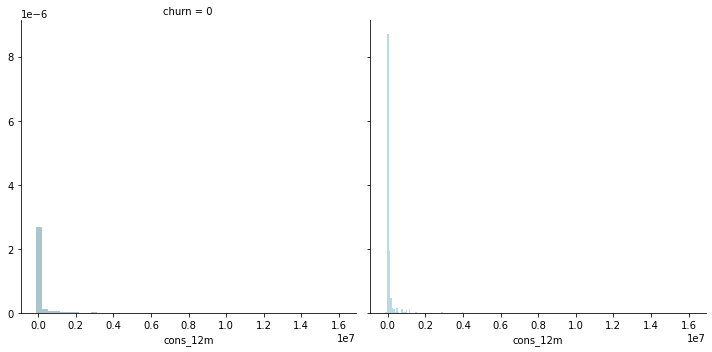

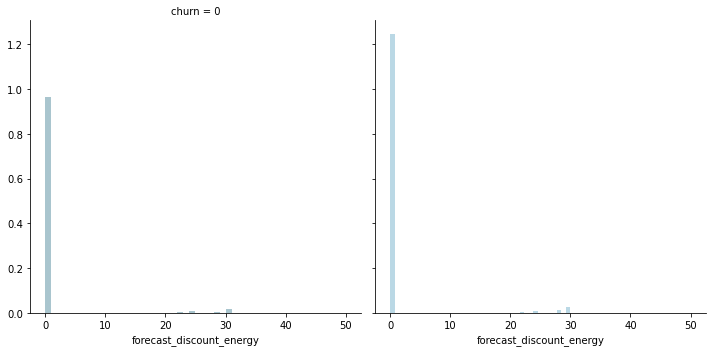

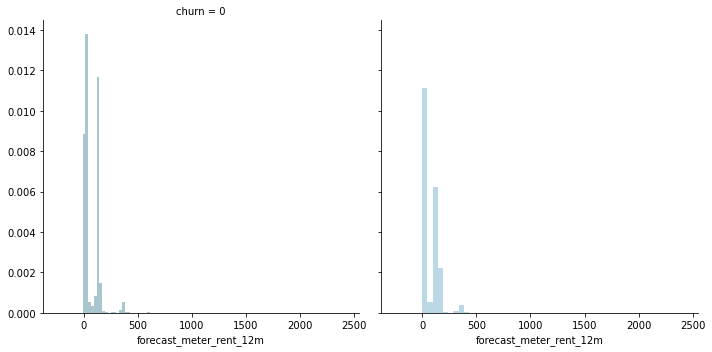

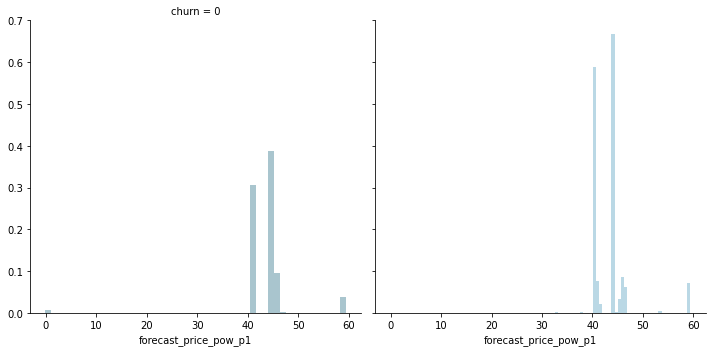

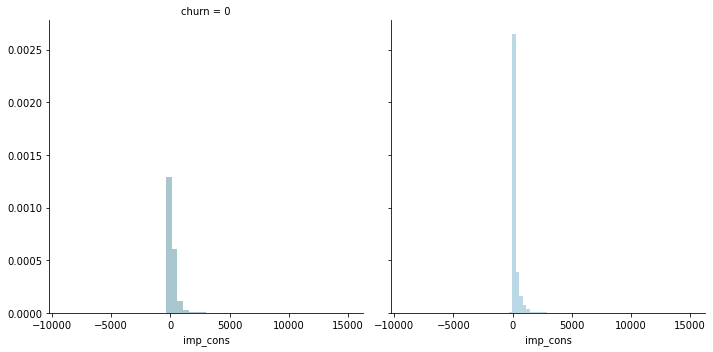

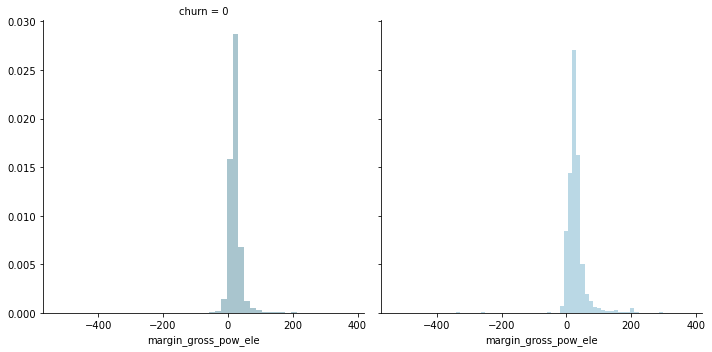

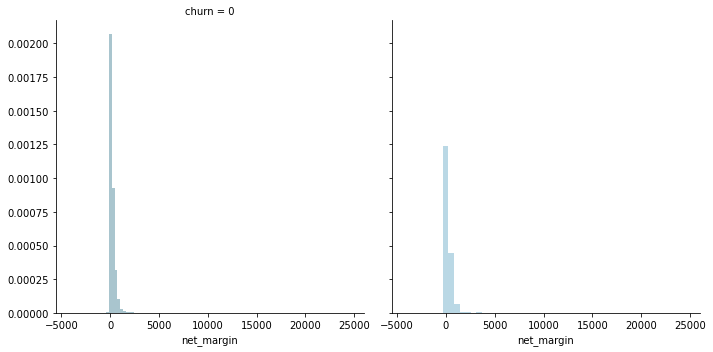

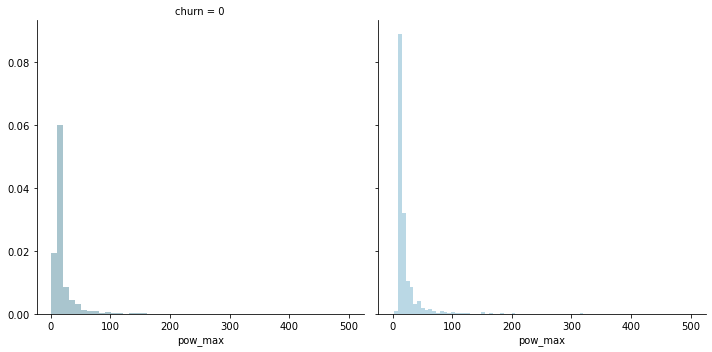

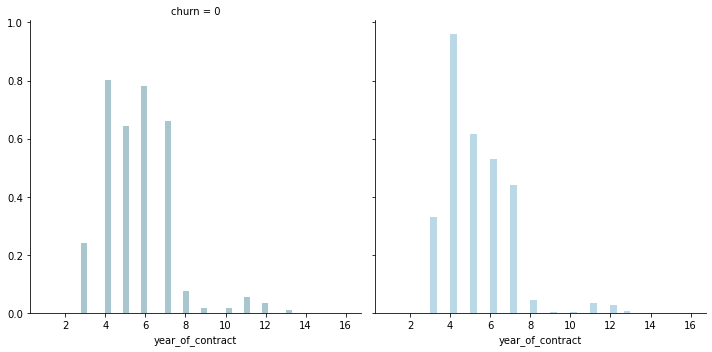

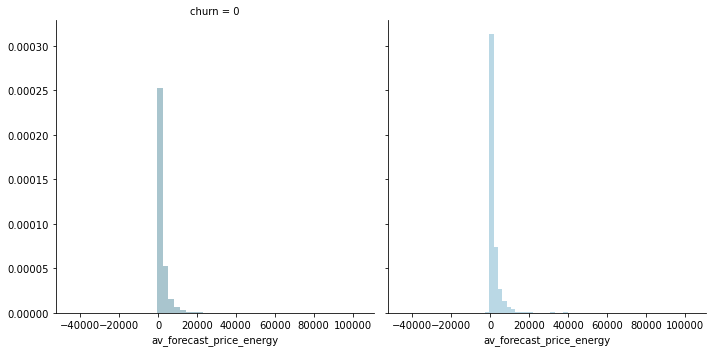

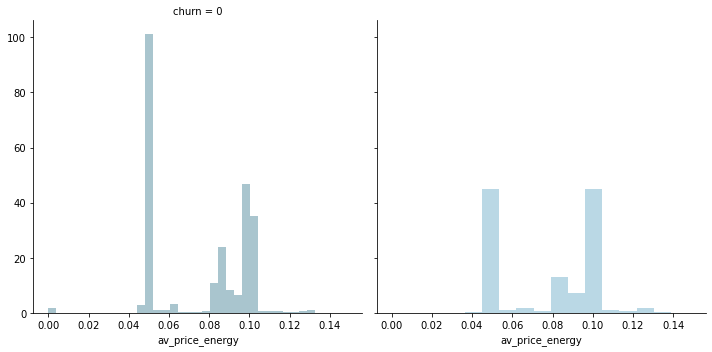

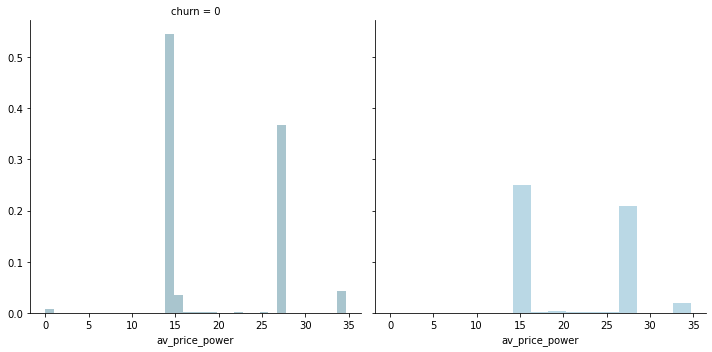

In [29]:
#fig, axe = plt.subplots(14, 1, figsize = (10, 10))
for col in data_clean.drop(['churn', 'date_modif_prod', 'date_renewal'], 1).columns:
#    print(f'summary for column base on churn {col}\n')
#    print(data_clean.groupby('churn')[col].describe())
    print('\n\n')
#    sns.distplot(data_clean[col], kde= False, ax = ax)
    g = sns.FacetGrid(data_clean, col = 'churn', 
                      height = 5, hue = 'churn', palette = 'PuBuGn_d');
    g.map(sns.distplot, col, kde = False, norm_hist = True);
    plt.title(print('summary for column base on churn {}\n{}\n'.format(col, data_clean.groupby('churn')[col].describe())))

In [30]:
def mapping(xs, ys):
    mapper = []
    for x in xs:
        for y in ys:
            if x != y:
                mapper.append((x, y))
        ys = ys[1:]
    return mapper

In [31]:
xs = data_clean.drop(['churn', 'date_modif_prod', 'date_renewal'], 1).columns
ys = data_clean.drop(['churn', 'date_modif_prod', 'date_renewal'], 1).columns

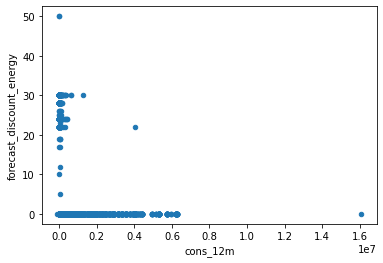

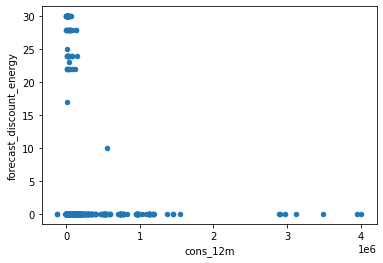

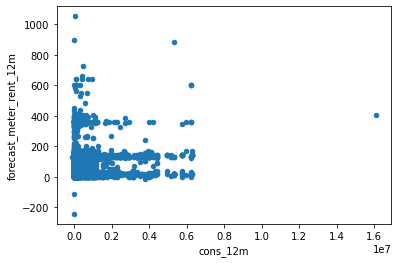

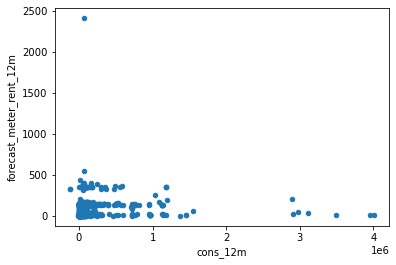

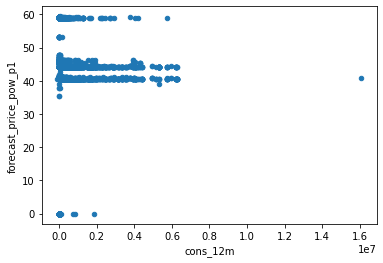

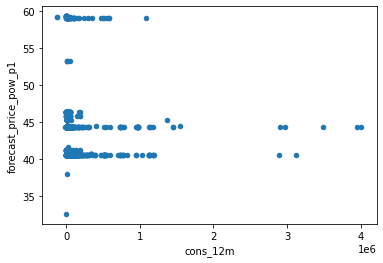

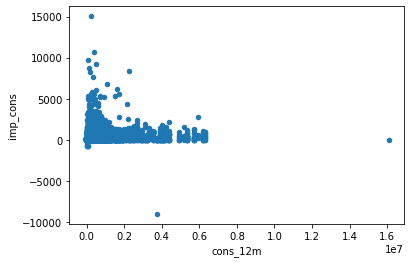

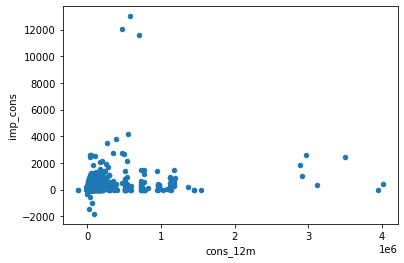

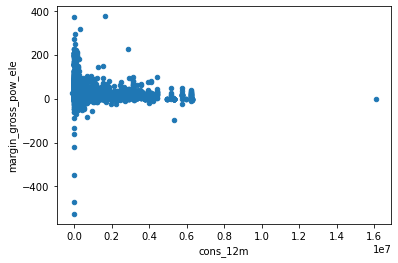

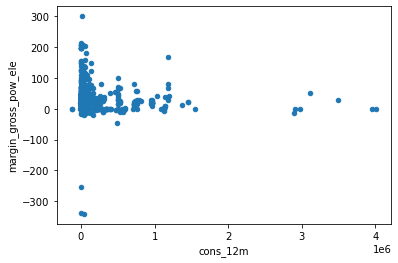

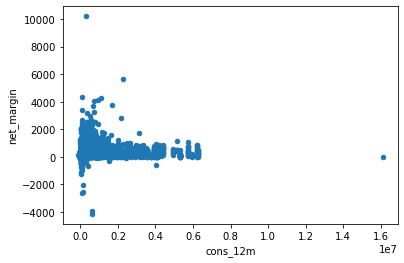

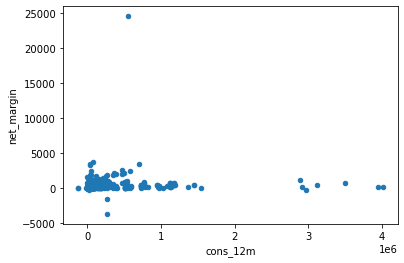

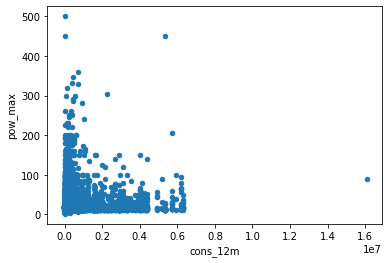

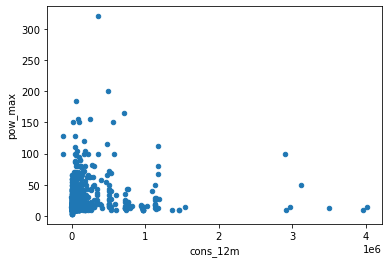

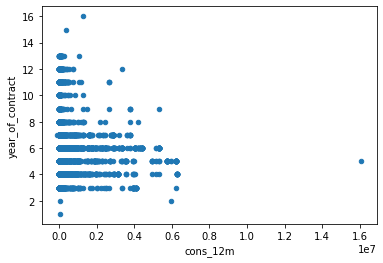

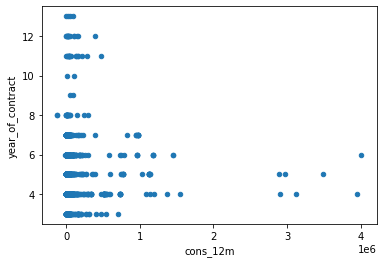

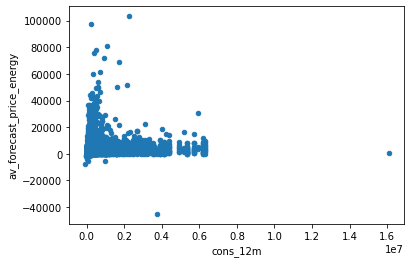

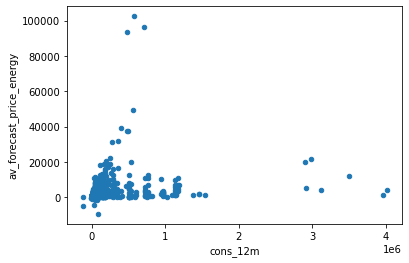

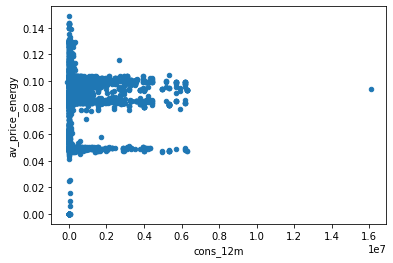

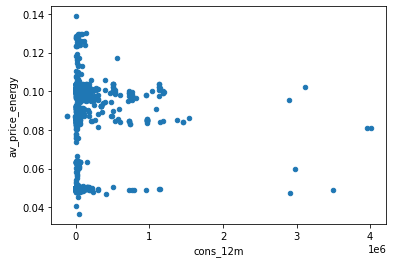

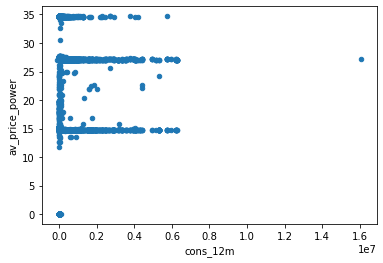

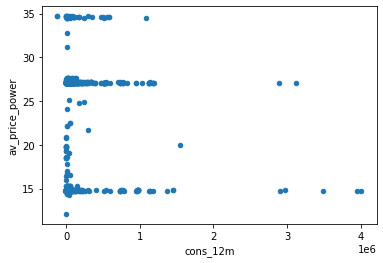

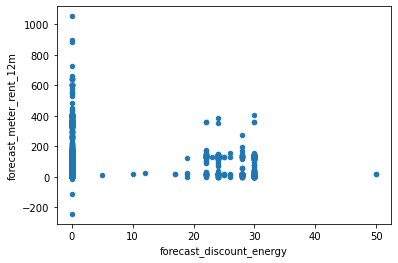

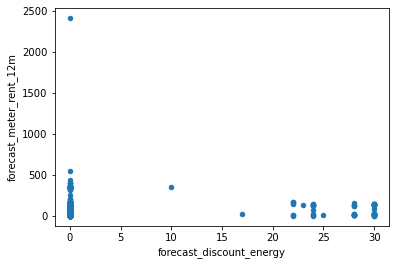

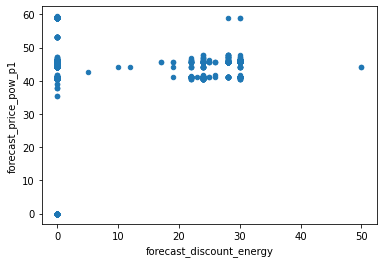

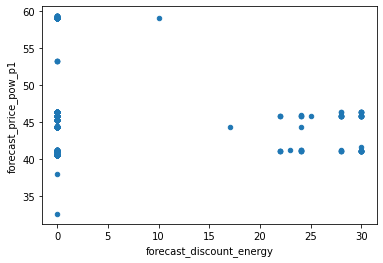

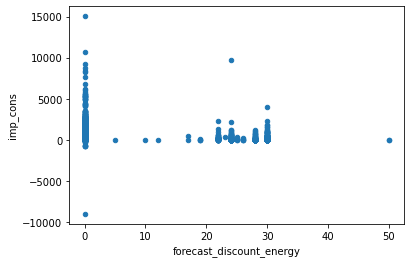

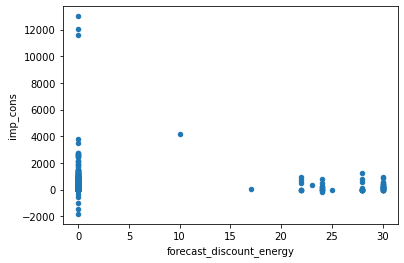

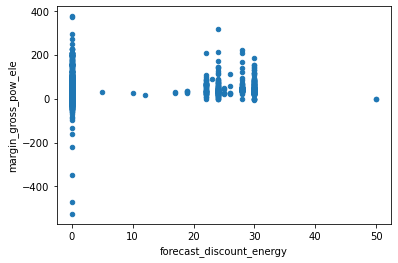

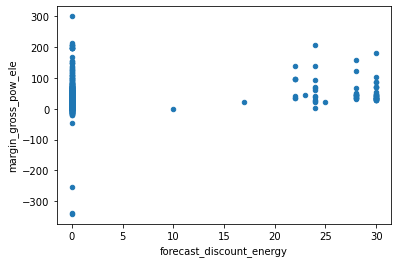

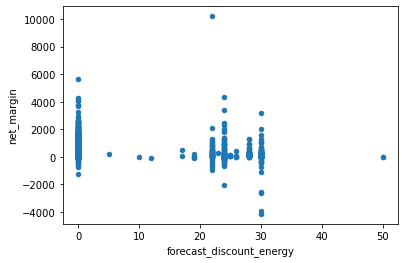

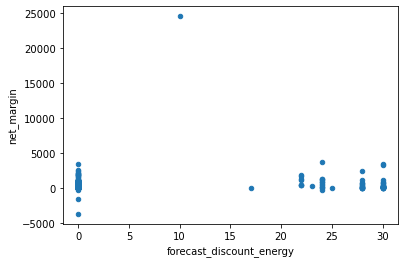

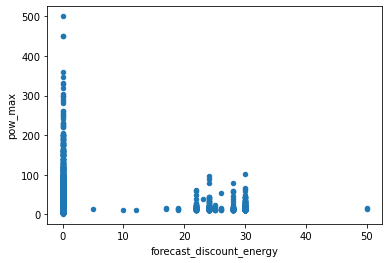

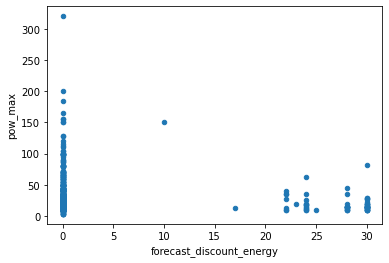

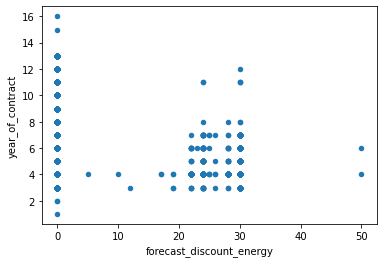

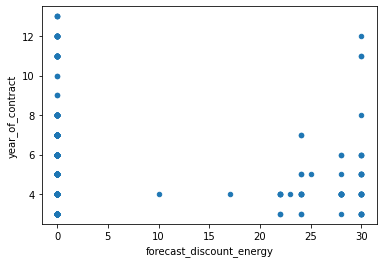

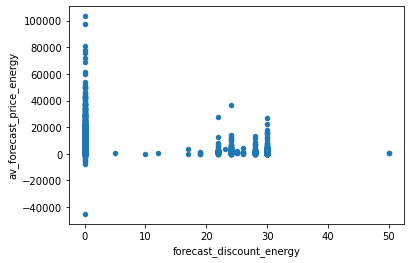

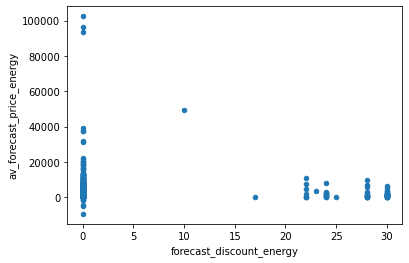

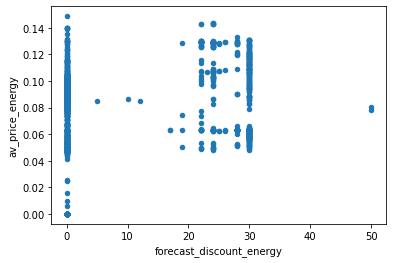

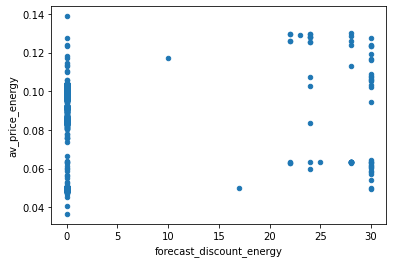

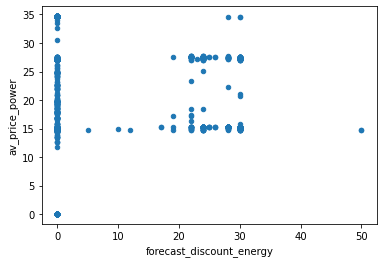

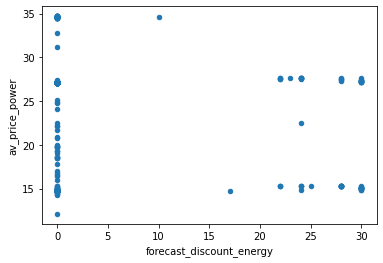

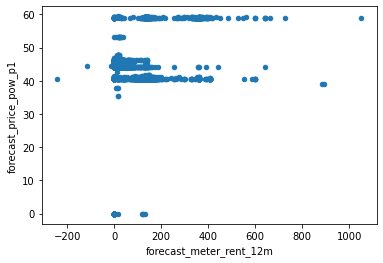

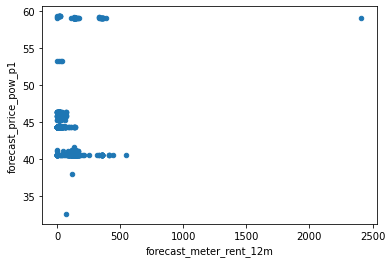

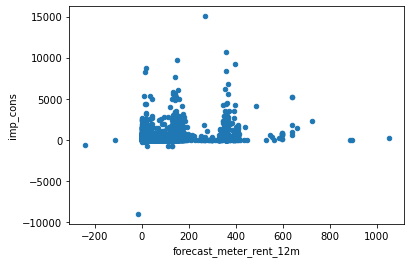

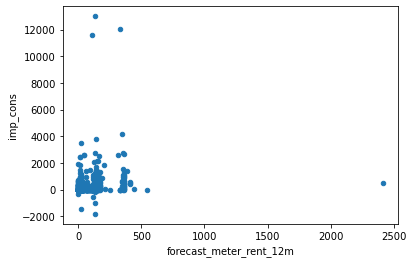

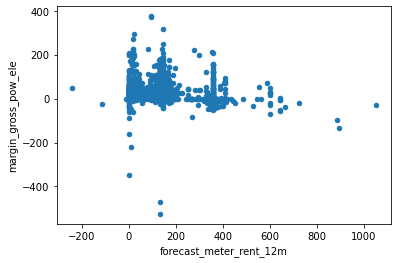

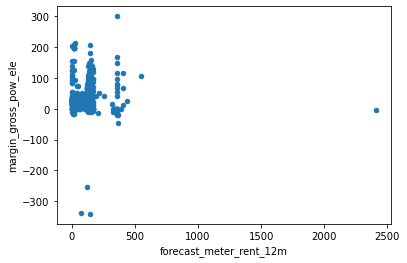

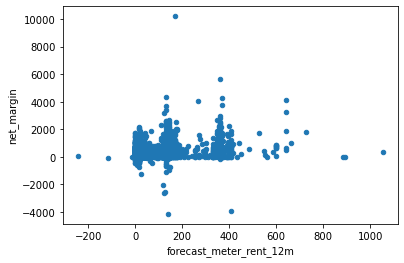

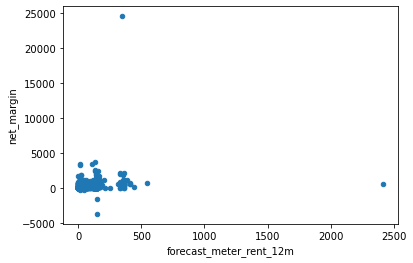

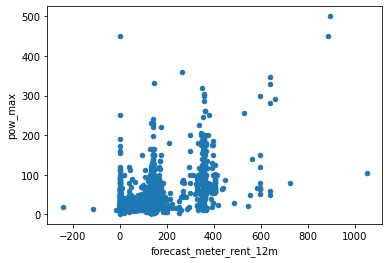

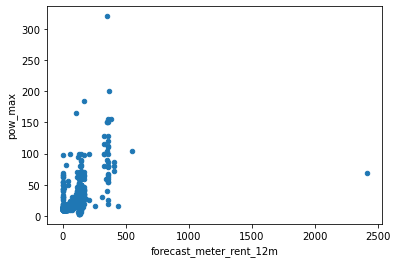

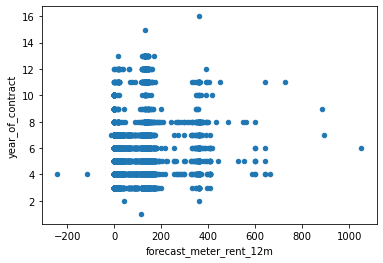

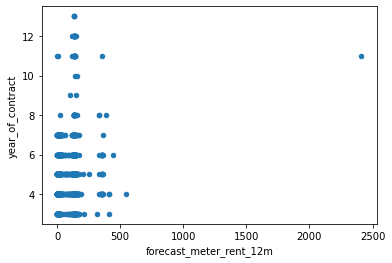

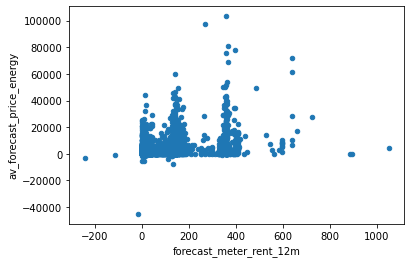

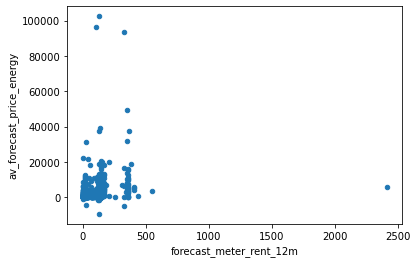

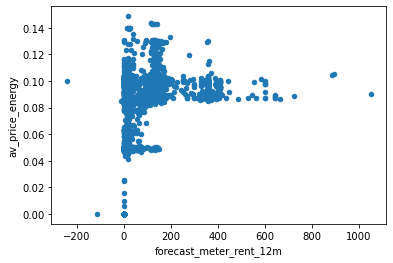

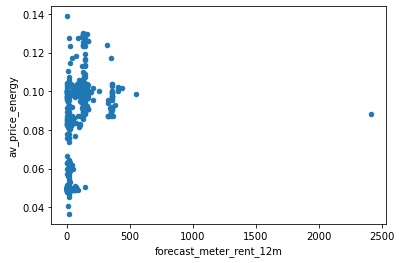

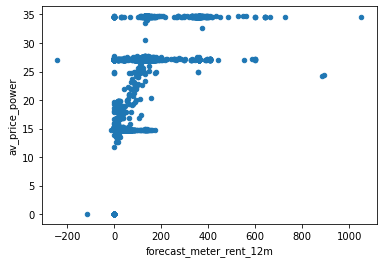

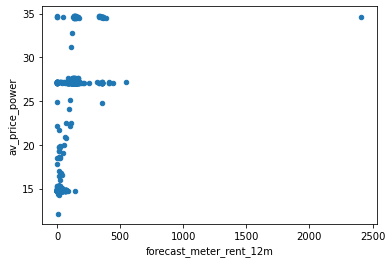

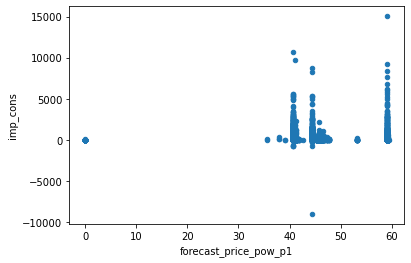

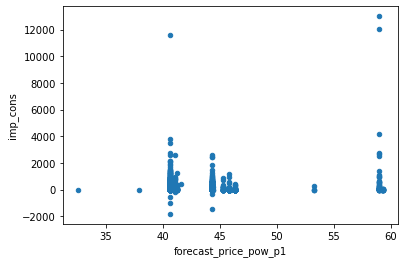

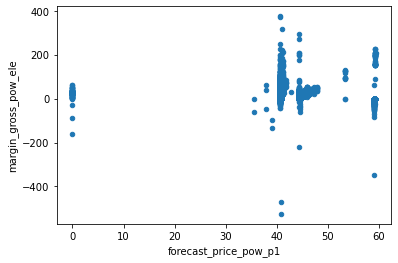

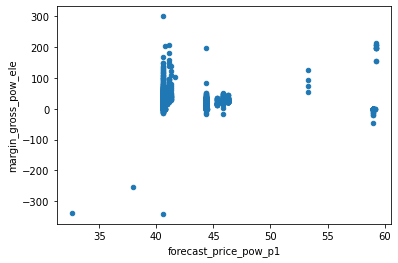

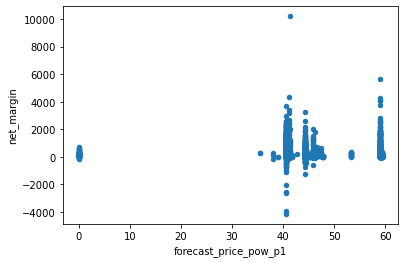

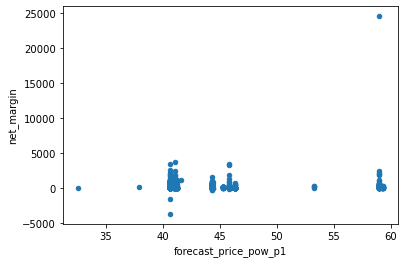

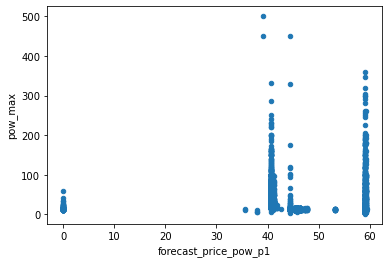

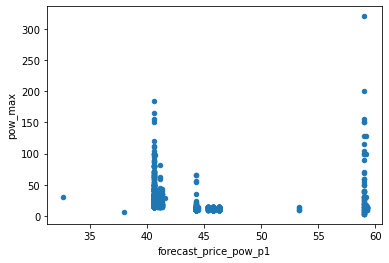

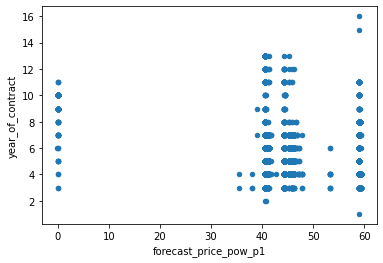

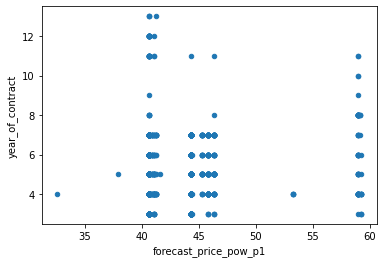

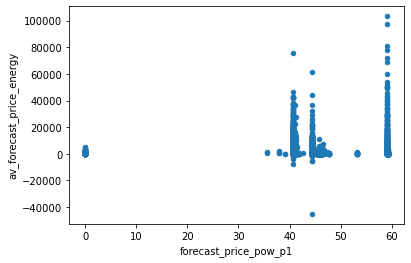

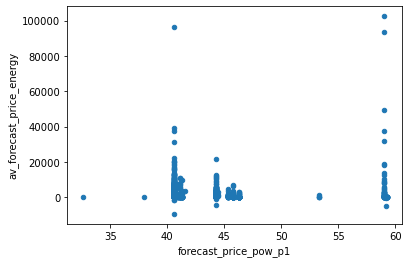

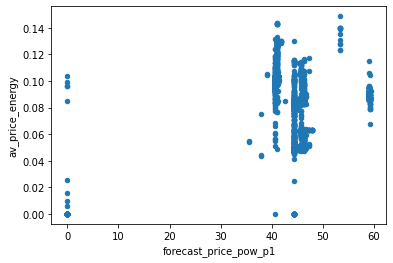

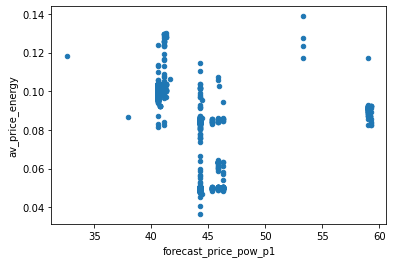

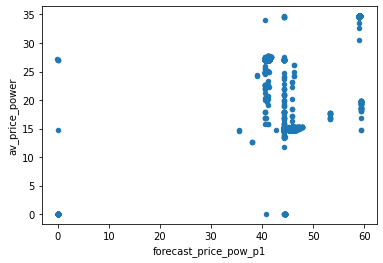

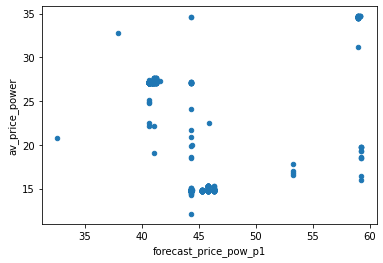

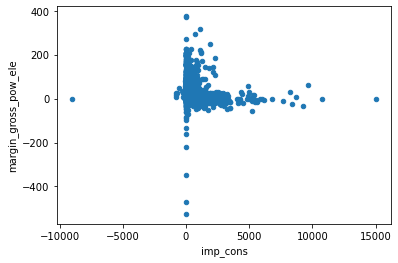

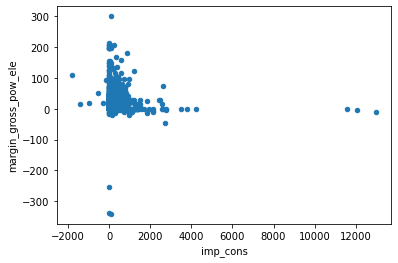

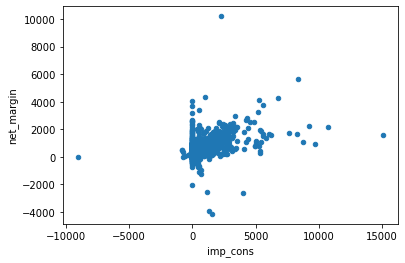

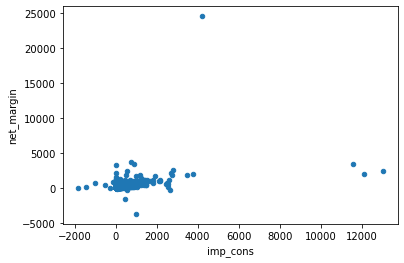

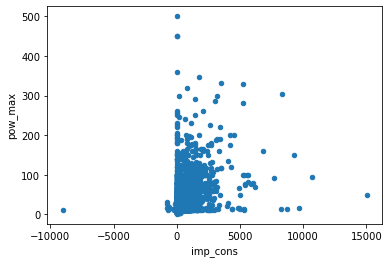

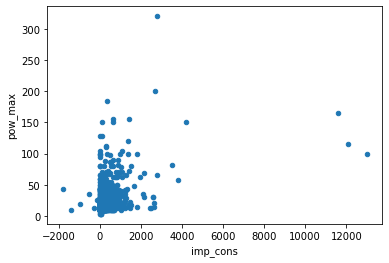

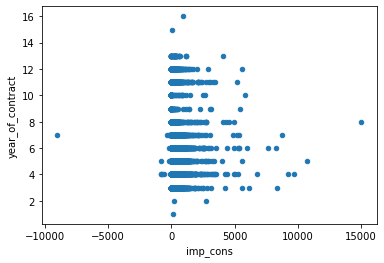

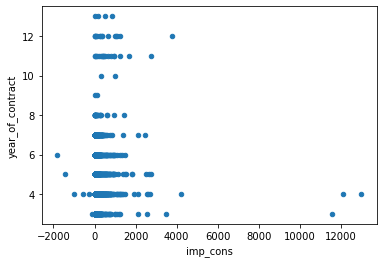

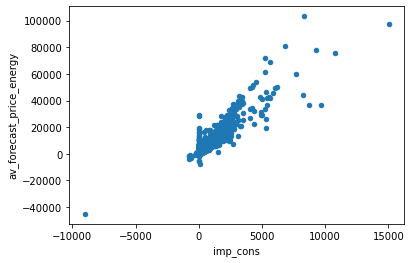

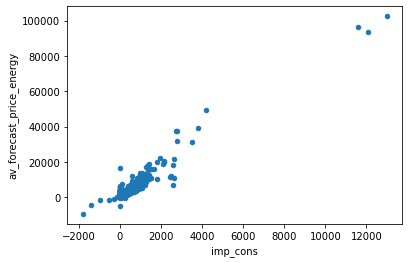

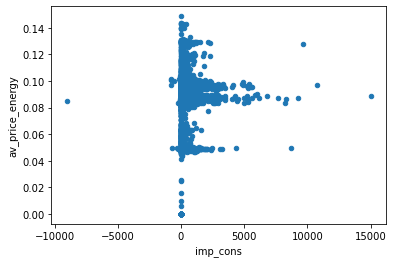

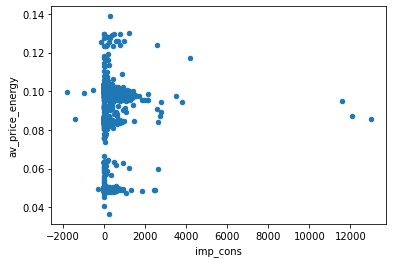

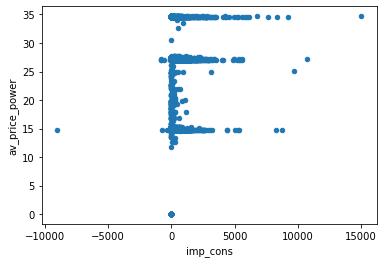

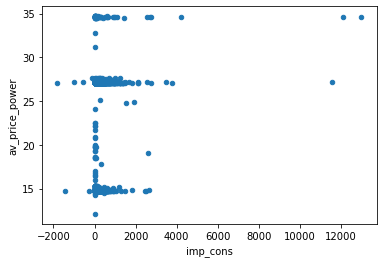

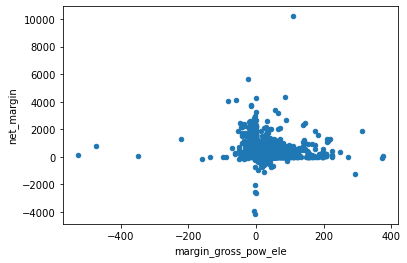

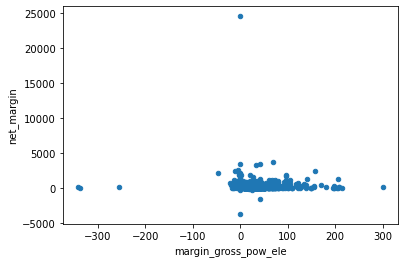

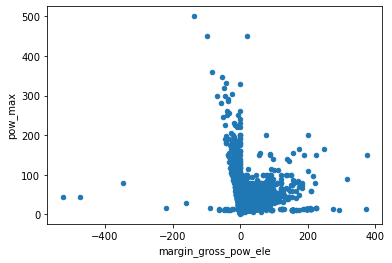

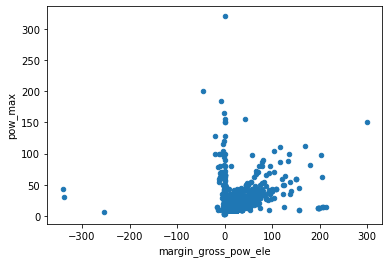

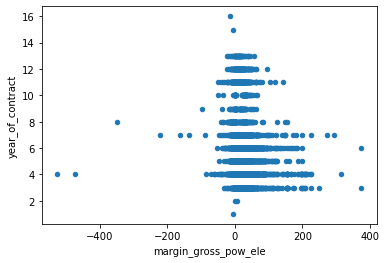

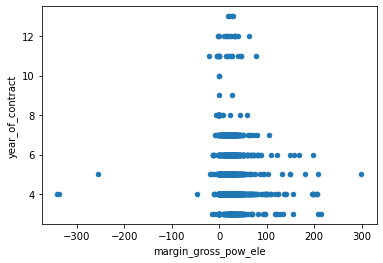

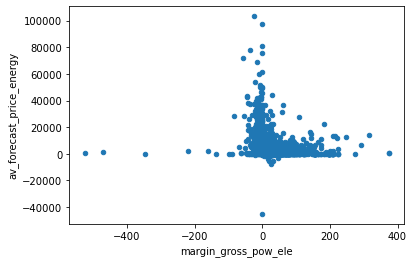

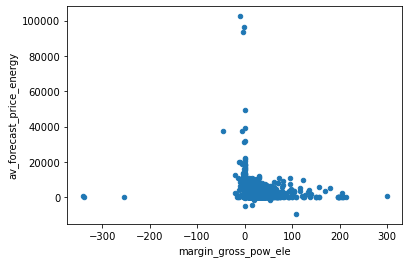

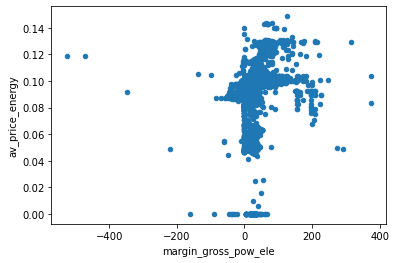

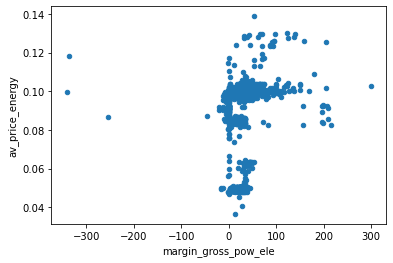

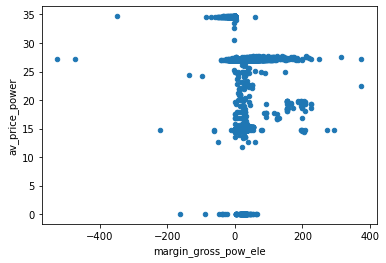

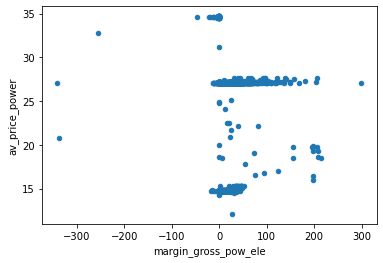

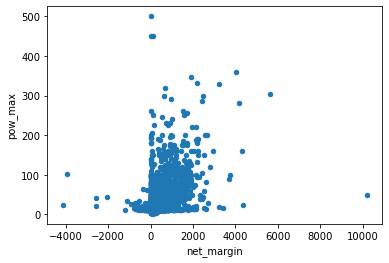

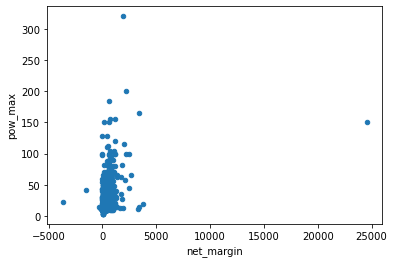

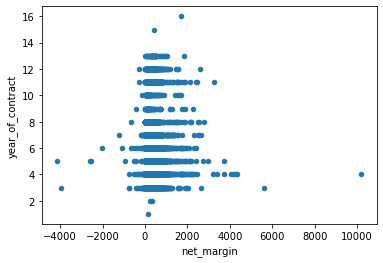

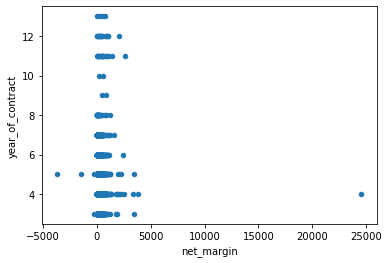

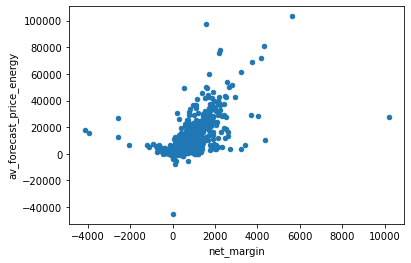

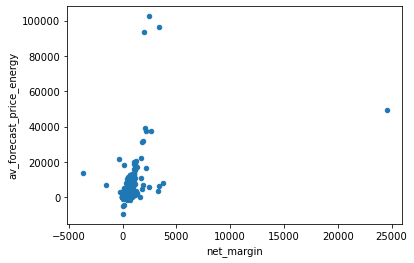

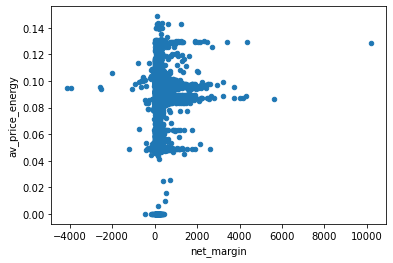

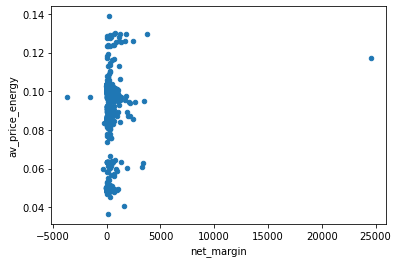

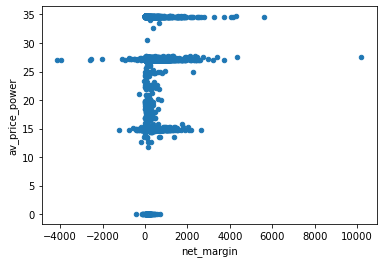

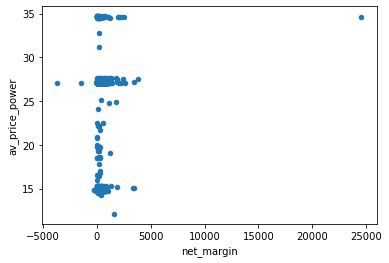

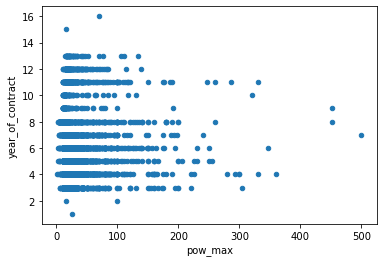

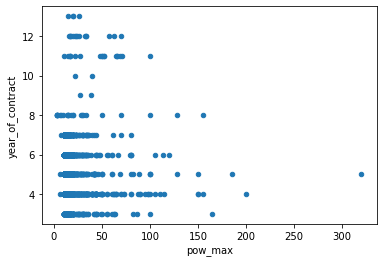

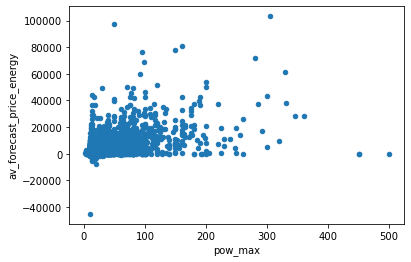

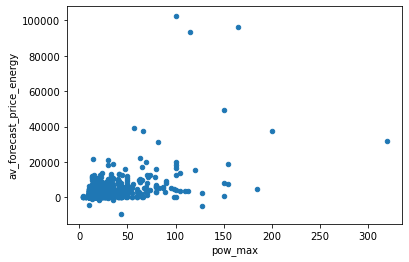

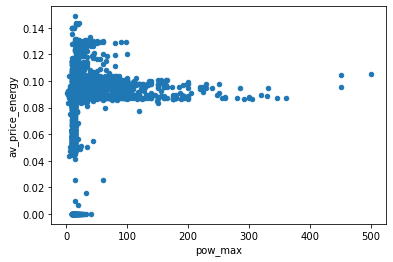

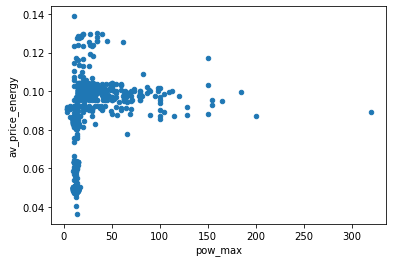

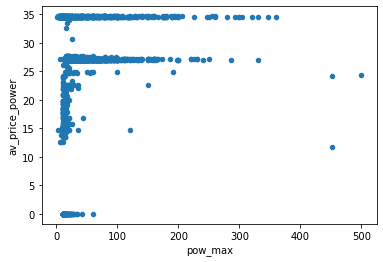

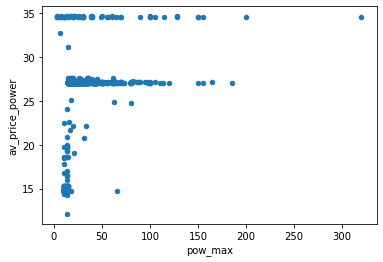

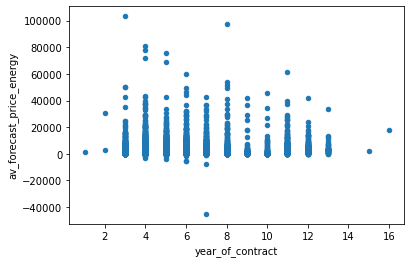

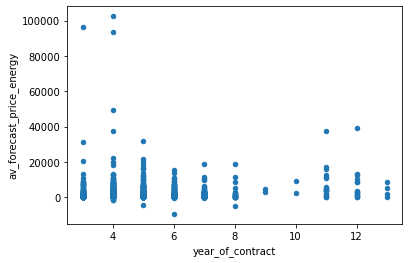

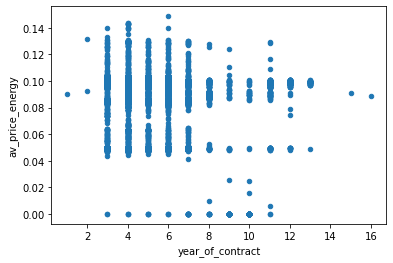

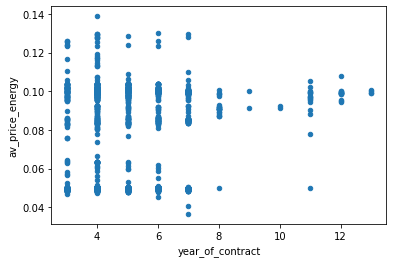

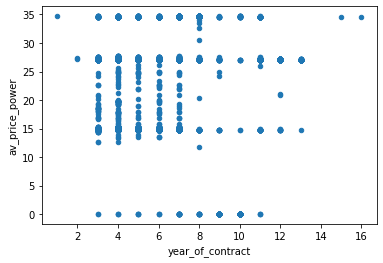

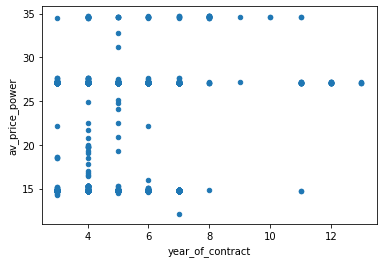

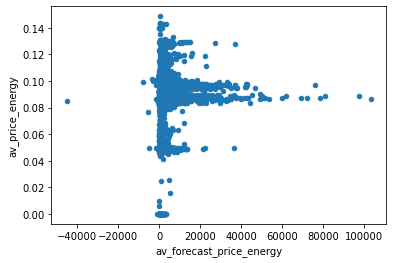

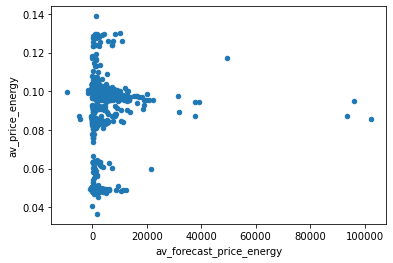

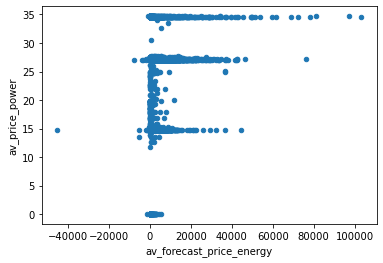

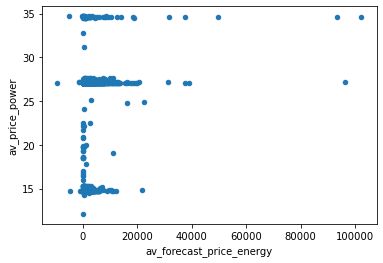

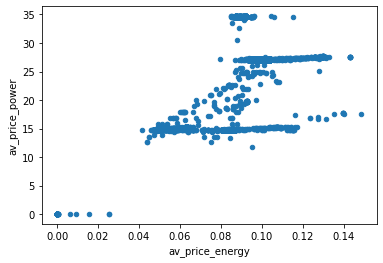

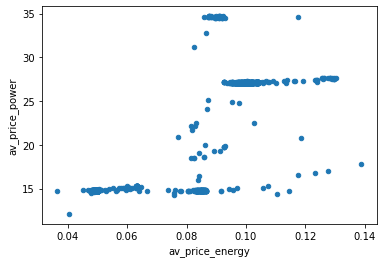

In [32]:
for x, y in mapping(xs, ys):
    data_clean.groupby('churn').plot.scatter(x = x, y = y)

In [33]:
normalize_data = data_clean.drop(['date_modif_prod', 'date_renewal', 'churn'], 1).apply(lambda x: np.tan(x)) 
normalize_data['churn'] = data_clean.churn
normalize_data.head()

cons_12m  forecast_discount_energy  \
id                                                                     
48ada52261e7cf58715202705a0451c9  1.289606                       0.0   
24011ae4ebbe3035111d65fa7c15bc57  0.000000                       0.0   
d29c2c54acc38ff3c0614d0a653813dd  1.621196                       0.0   
764c75f661154dac3a6c254cd082ea7d  0.552122                       0.0   
bba03439a292a1e166f80264c16191cb  0.740360                       0.0   

                                  forecast_meter_rent_12m  \
id                                                          
48ada52261e7cf58715202705a0451c9                 2.225165   
24011ae4ebbe3035111d65fa7c15bc57                -4.710092   
d29c2c54acc38ff3c0614d0a653813dd                 0.629790   
764c75f661154dac3a6c254cd082ea7d                 1.631378   
bba03439a292a1e166f80264c16191cb                 1.492390   

                                  forecast_price_pow_p1  imp_cons  \
id                                                                  
48ada52261e7cf58715202705a0451c9              -0.832605 -0.880707   
24011ae4ebbe3035111d65fa7c15bc57              -0.238370  0.000000   
d29c2c54acc38ff3c0614d0a653813dd               0.341498  0.000000   
764c75f661154dac3a6c254cd082ea7d               0.341498  0.000000   
bba03439a292a1e166f80264c16191cb               0.341498  0.000000   

                                  margin_gross_pow_ele  net_margin   pow_max  \
id                                                                             
48ada52261e7cf58715202705a0451c9             -1.311346    4.302890  1.338690   
24011ae4ebbe3035111d65fa7c15bc57              0.317308    0.429868 -0.347333   
d29c2c54acc38ff3c0614d0a653813dd              0.795575    0.040466  2.852640   
764c75f661154dac3a6c254cd082ea7d              0.337690    0.327858  3.462386   
bba03439a292a1e166f80264c16191cb             -2.541450    0.339465  0.734688   

                                  year_of_contract  av_forecast_price_energy  \
id                                                                             
48ada52261e7cf58715202705a0451c9          1.157821                  2.217387   
24011ae4ebbe3035111d65fa7c15bc57         -0.142547                  0.000000   
d29c2c54acc38ff3c0614d0a653813dd          0.871448                  0.889924   
764c75f661154dac3a6c254cd082ea7d         -0.291006                 -2.251026   
bba03439a292a1e166f80264c16191cb         -0.291006                  0.743735   

                                  av_price_energy  av_price_power  churn  
id                                                                        
48ada52261e7cf58715202705a0451c9         0.087826       -0.007373      0  
24011ae4ebbe3035111d65fa7c15bc57         0.099517       -2.434081      1  
d29c2c54acc38ff3c0614d0a653813dd         0.050020       -1.358247      0  
764c75f661154dac3a6c254cd082ea7d         0.086526       -1.293865      0  
bba03439a292a1e166f80264c16191cb         0.050446       -1.280743      0

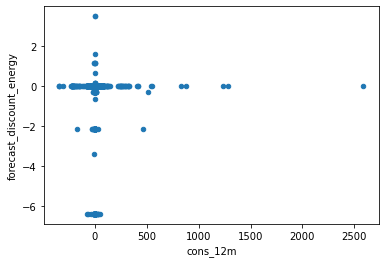

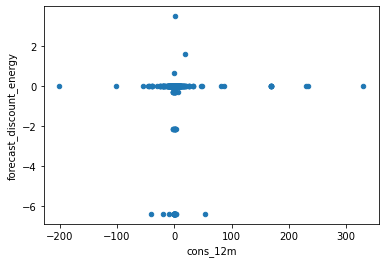

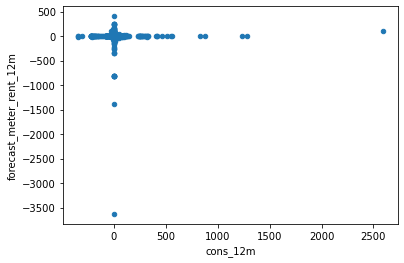

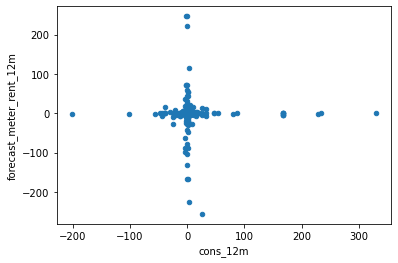

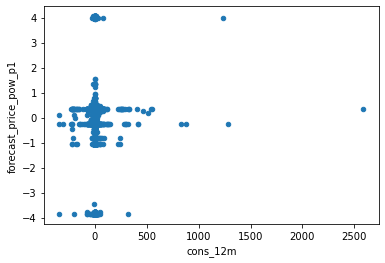

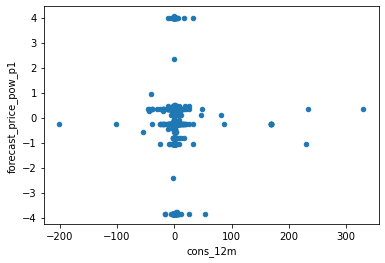

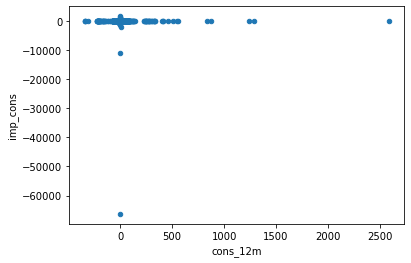

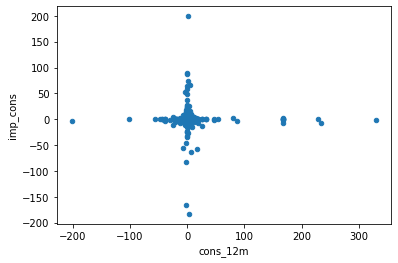

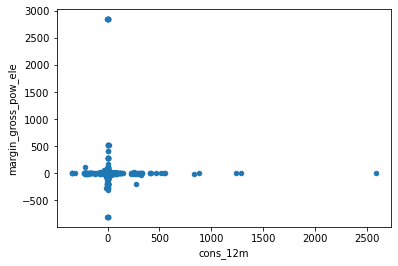

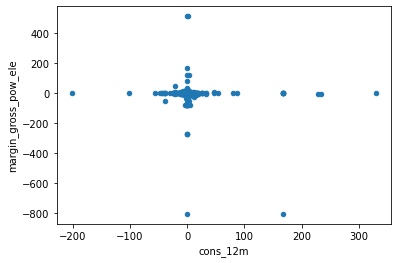

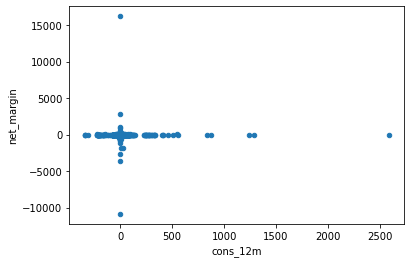

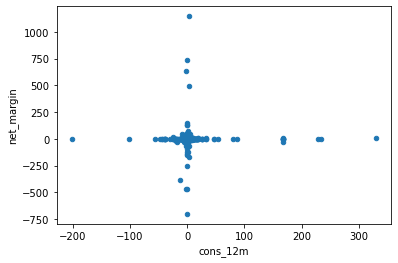

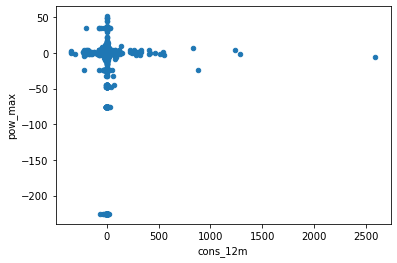

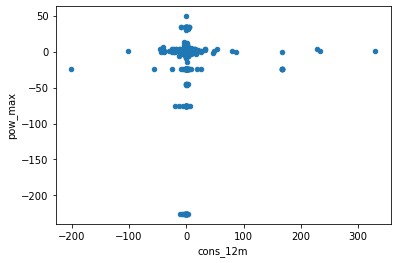

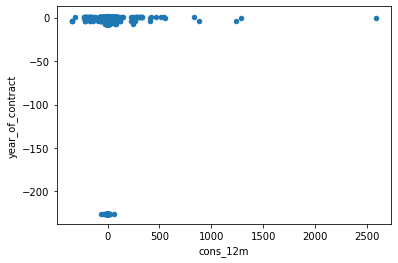

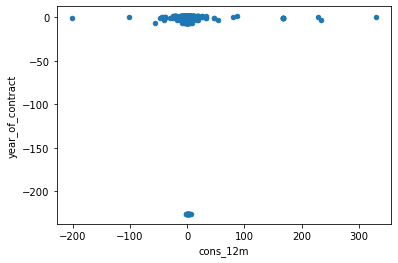

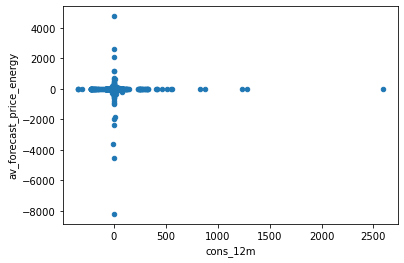

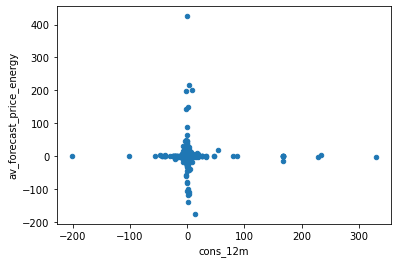

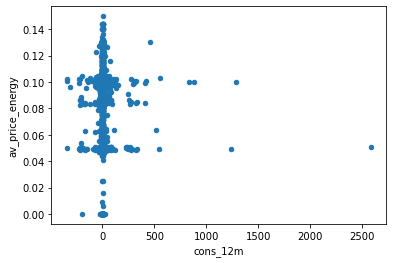

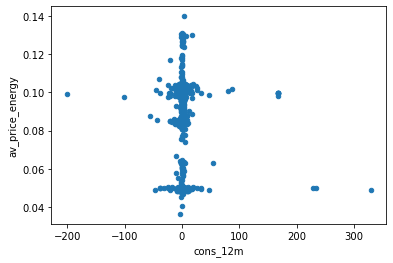

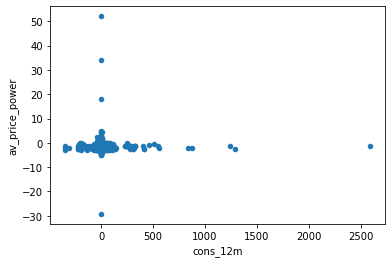

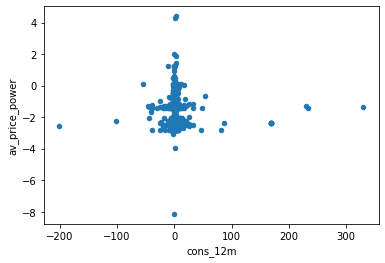

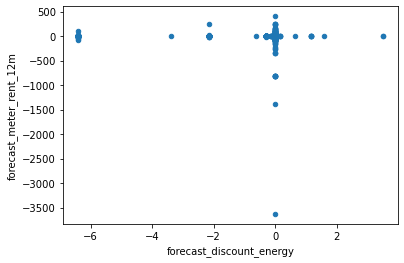

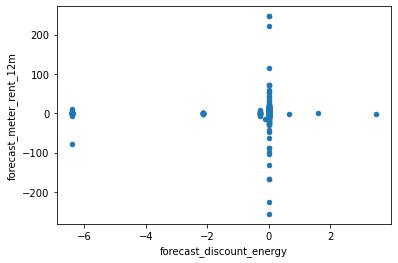

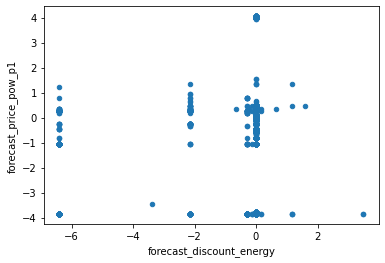

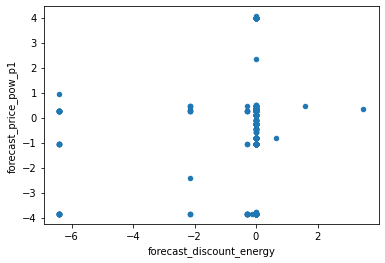

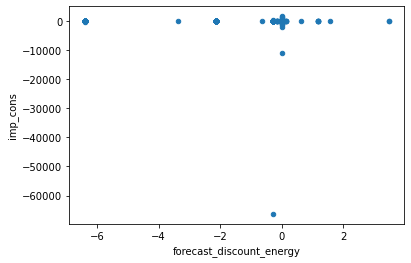

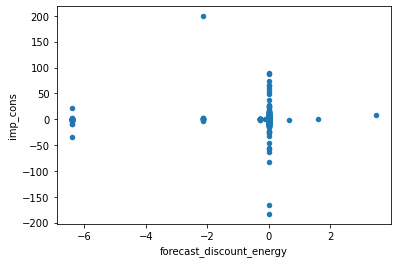

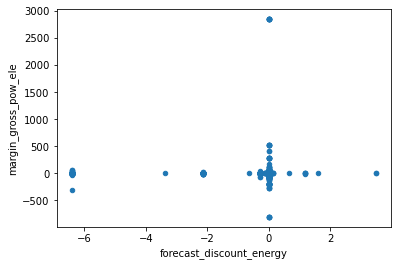

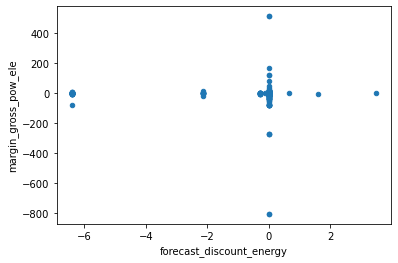

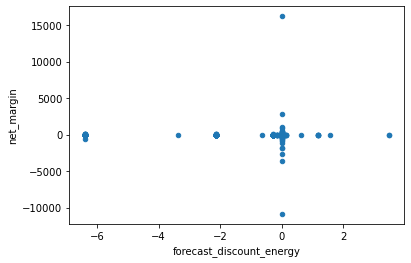

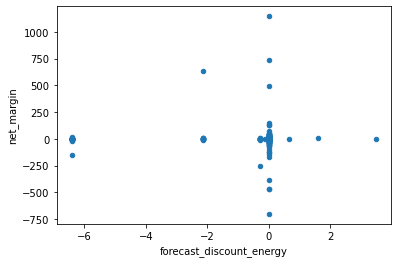

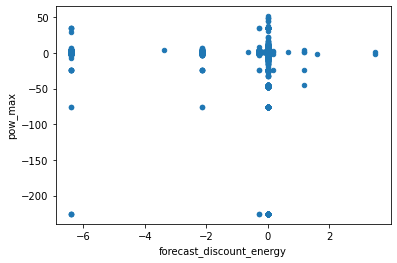

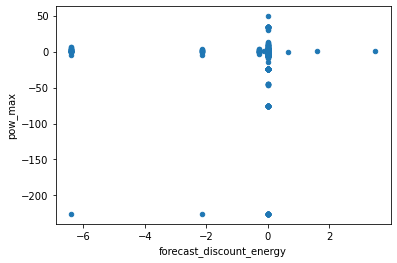

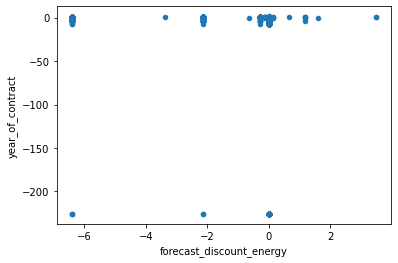

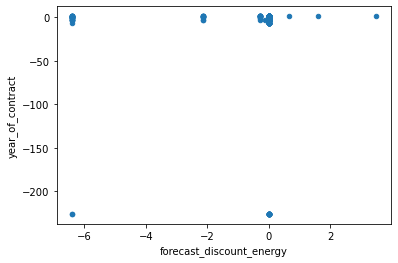

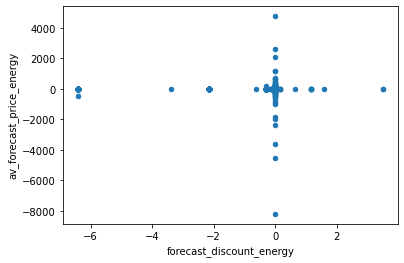

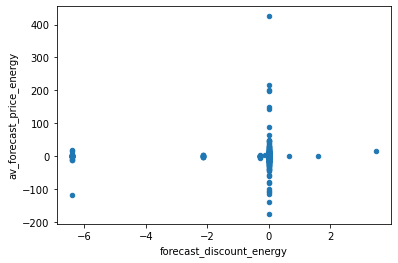

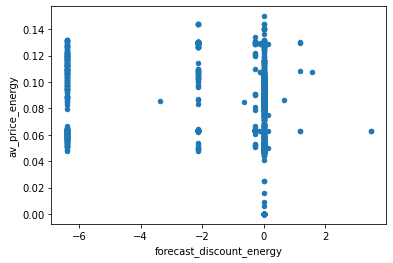

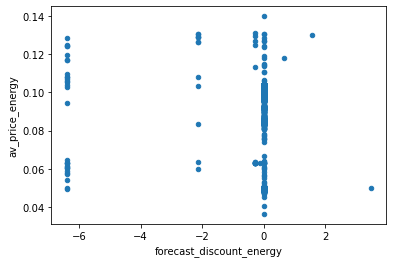

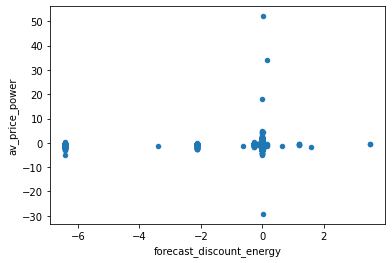

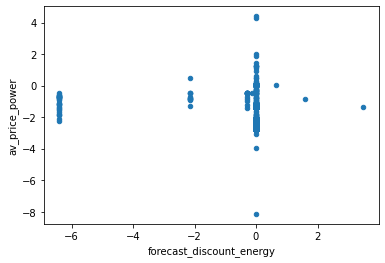

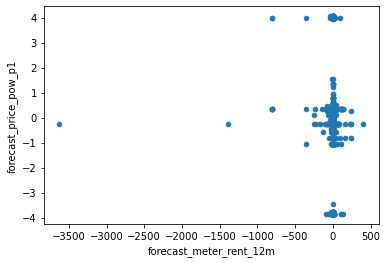

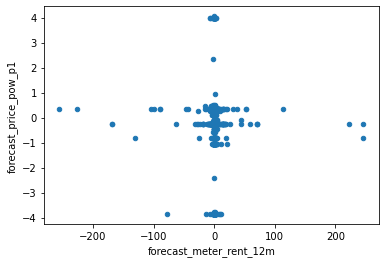

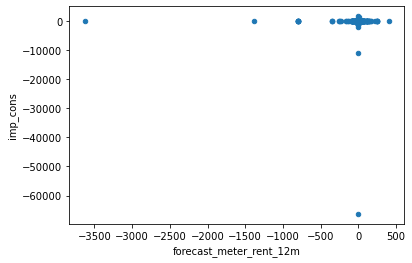

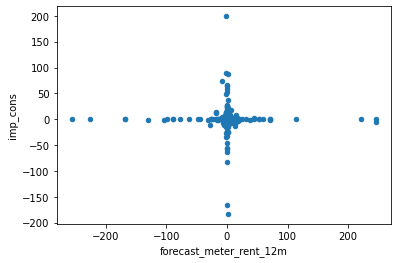

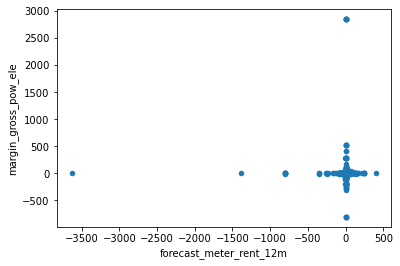

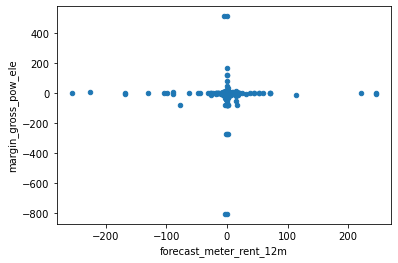

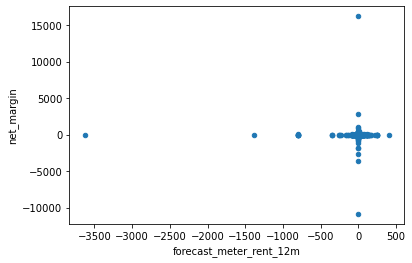

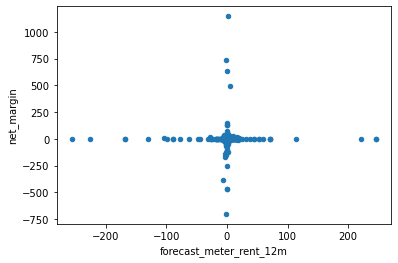

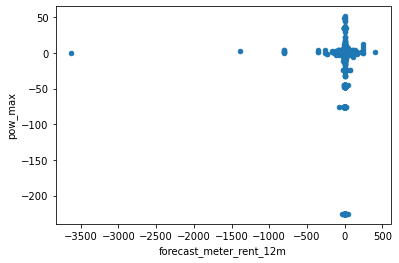

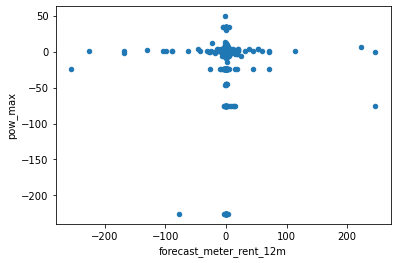

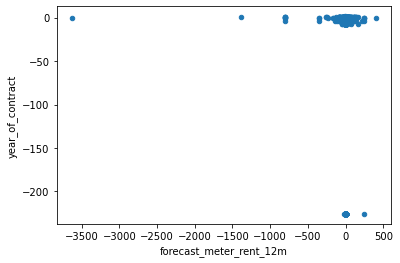

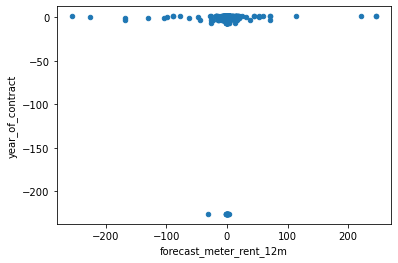

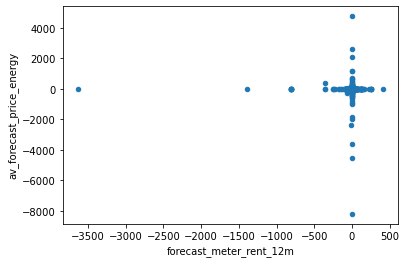

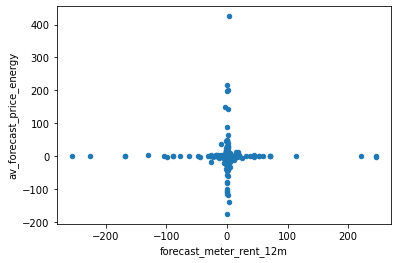

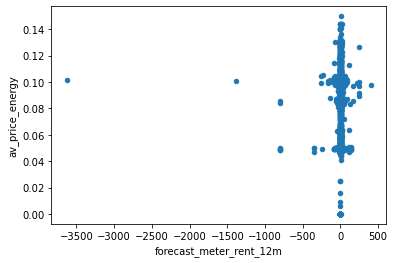

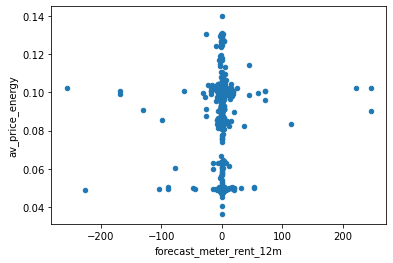

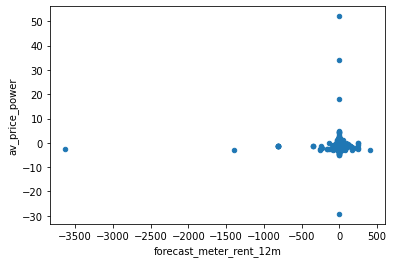

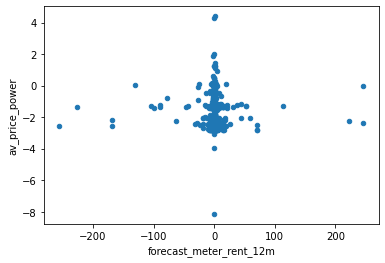

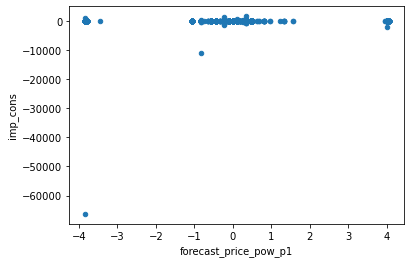

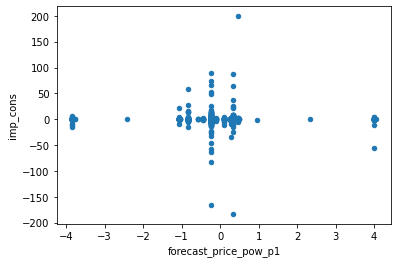

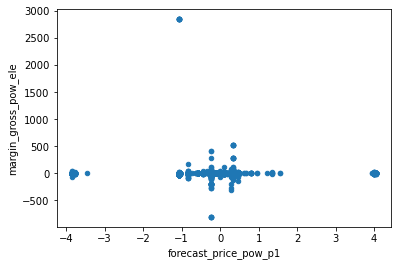

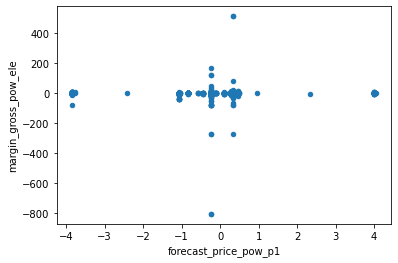

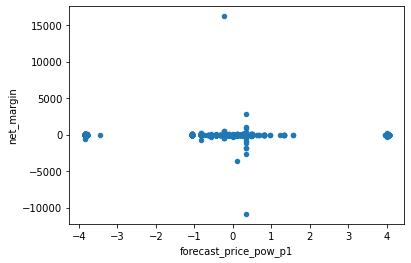

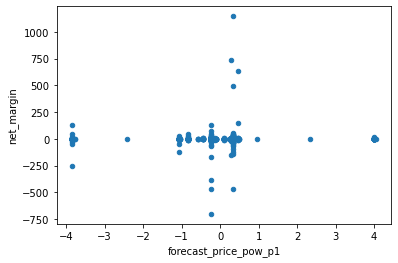

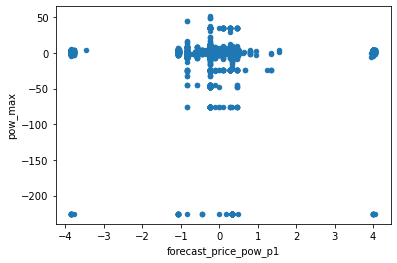

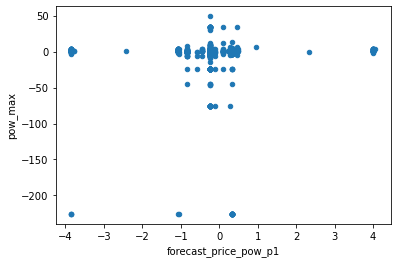

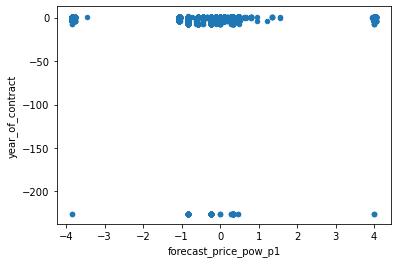

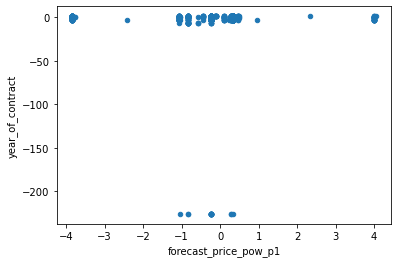

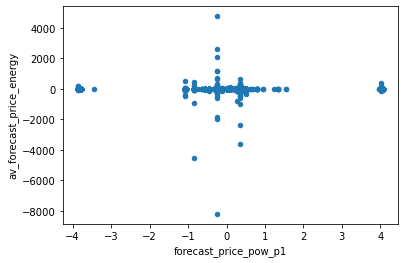

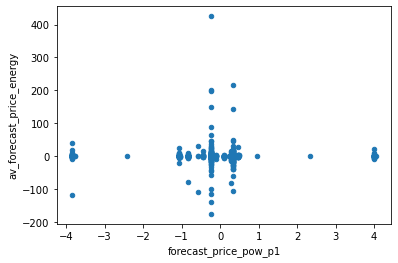

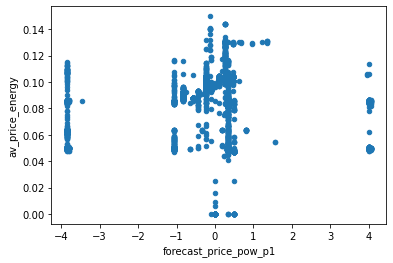

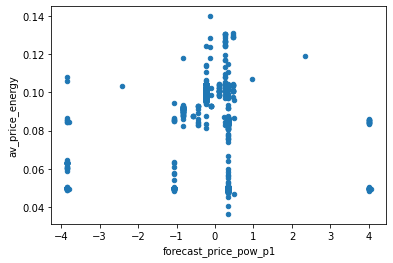

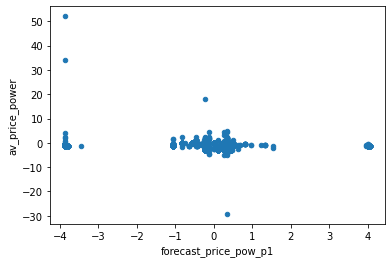

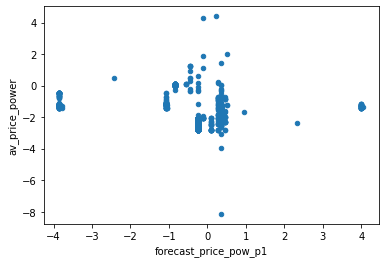

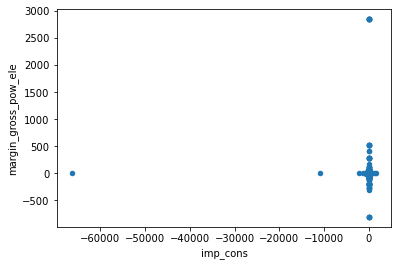

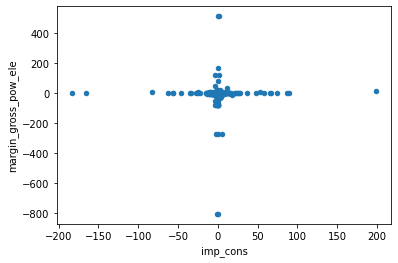

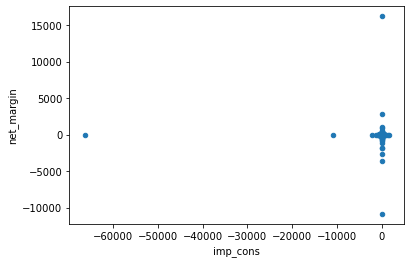

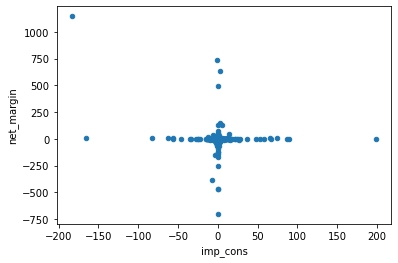

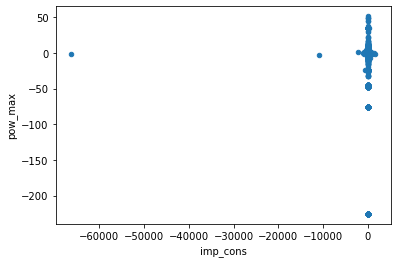

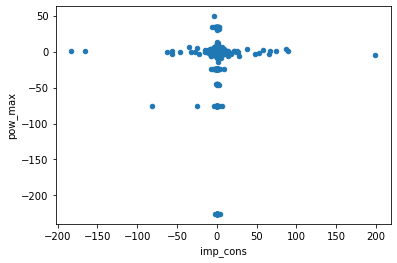

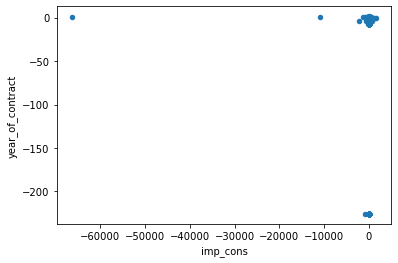

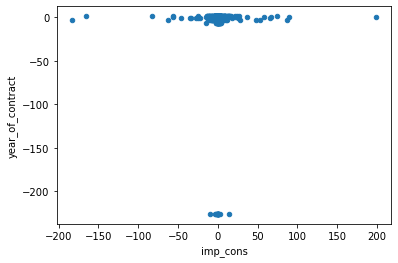

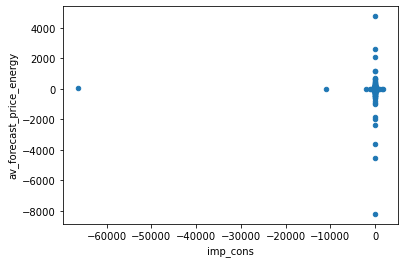

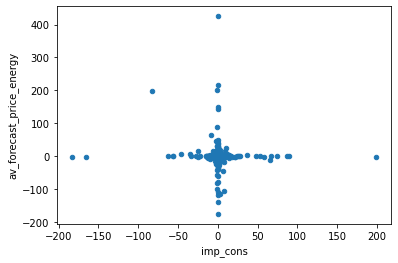

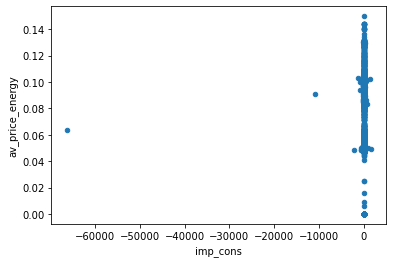

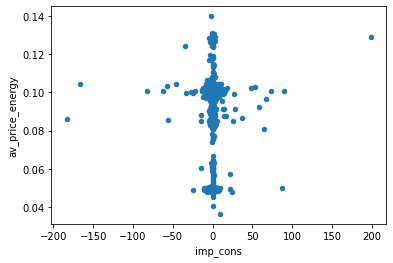

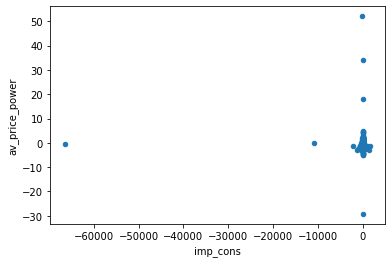

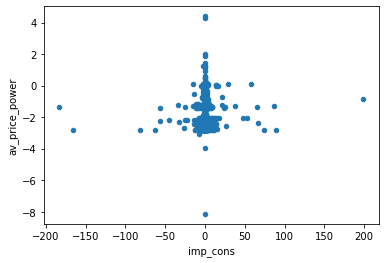

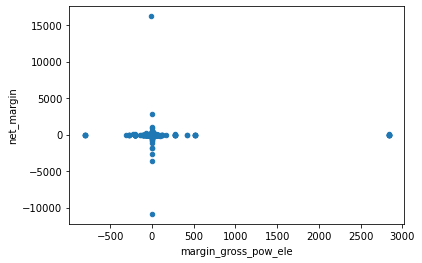

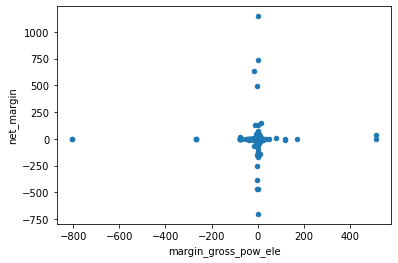

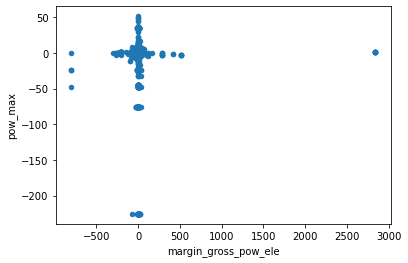

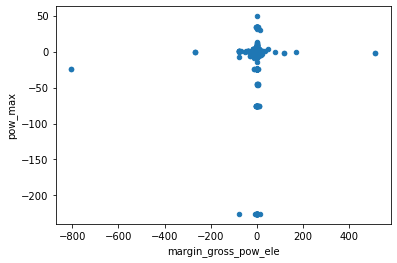

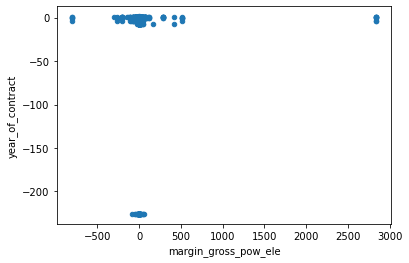

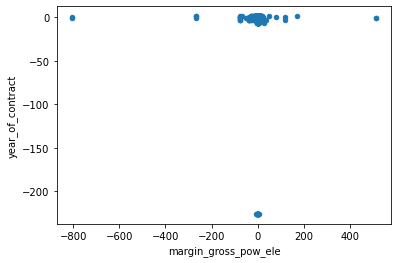

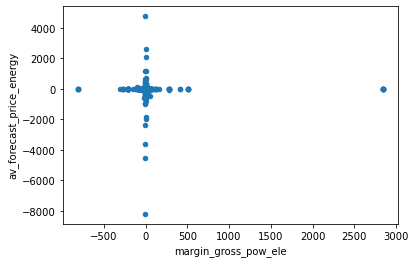

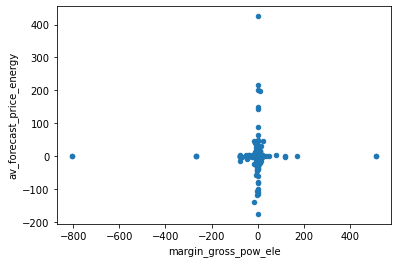

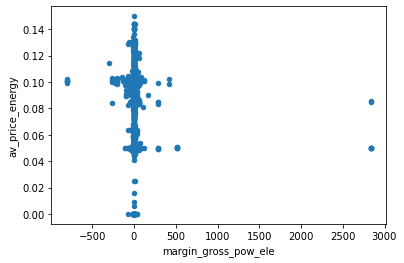

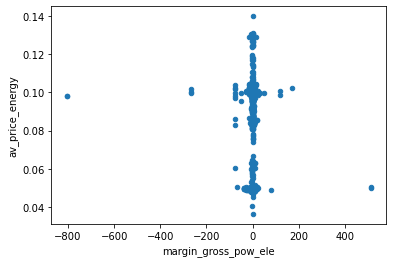

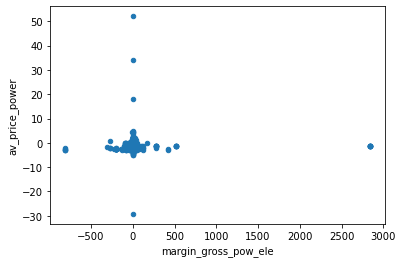

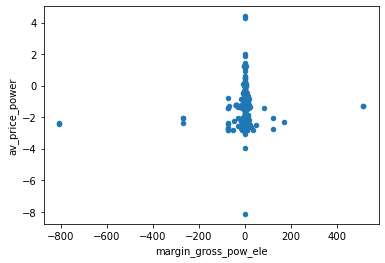

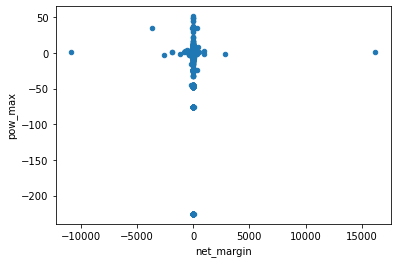

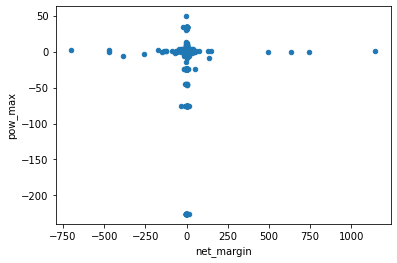

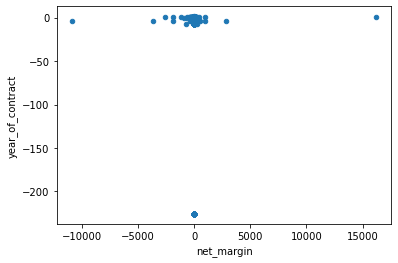

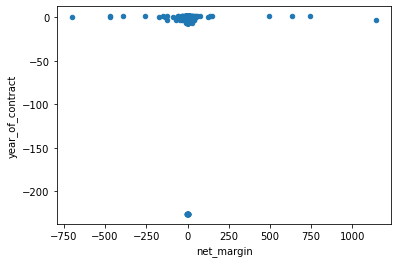

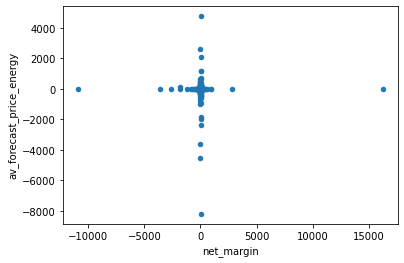

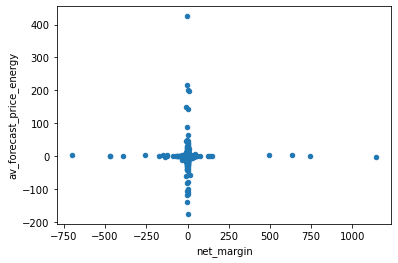

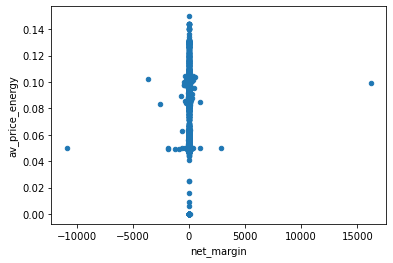

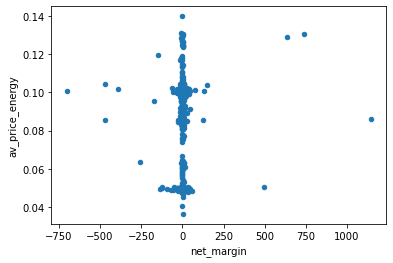

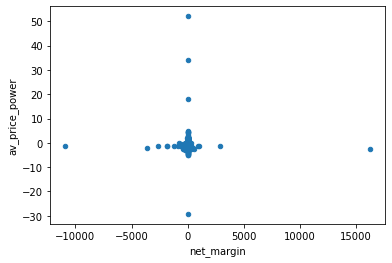

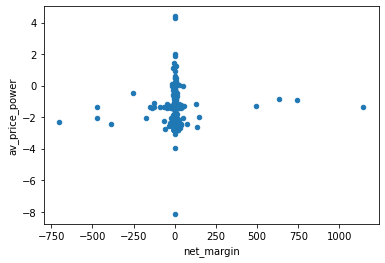

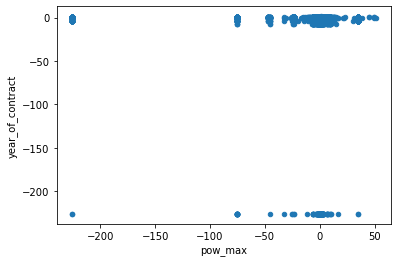

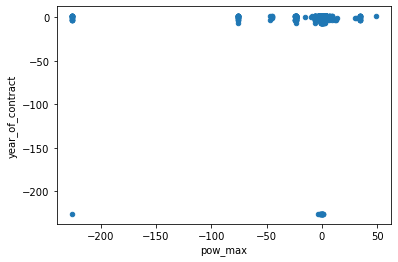

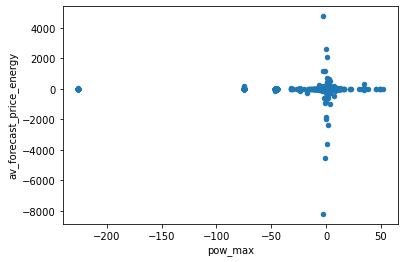

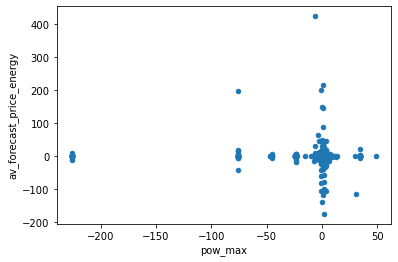

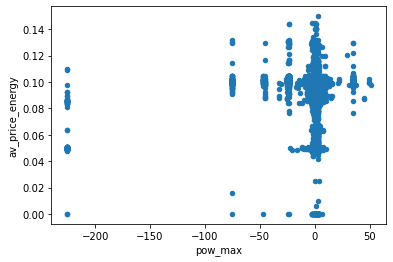

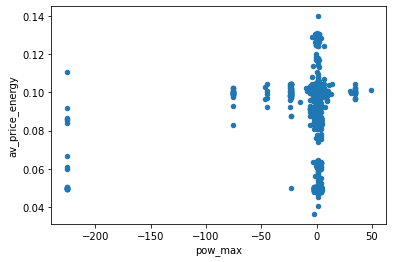

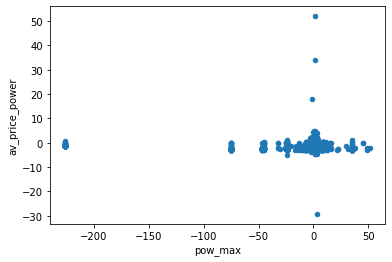

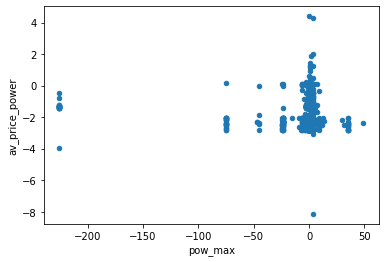

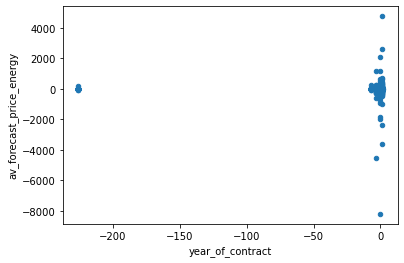

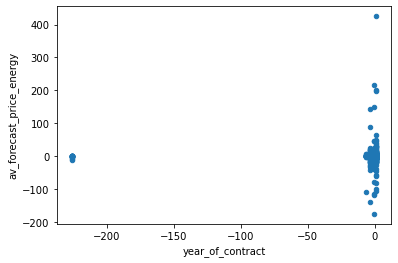

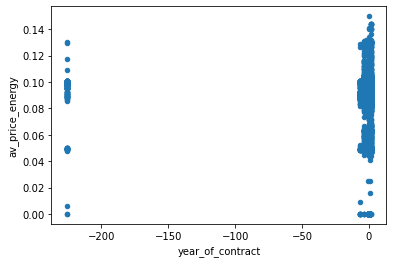

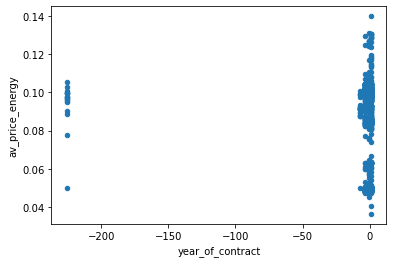

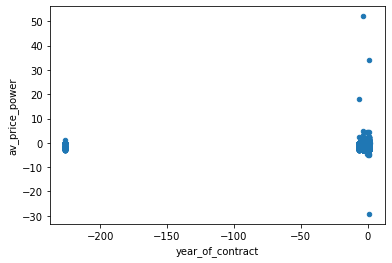

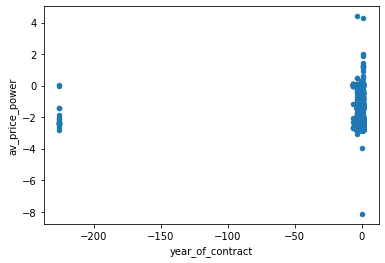

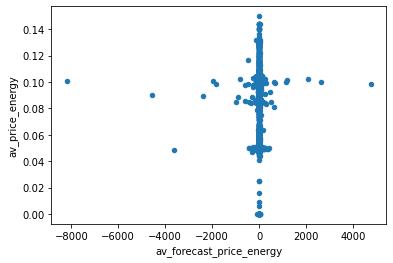

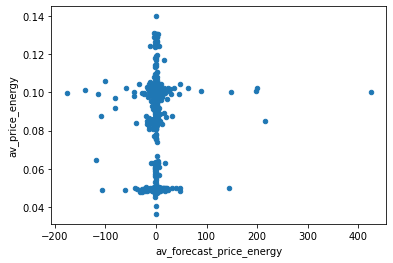

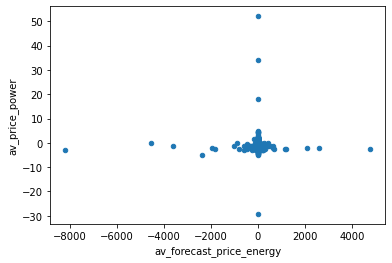

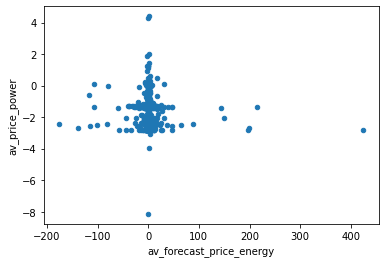

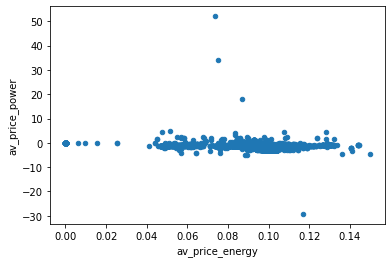

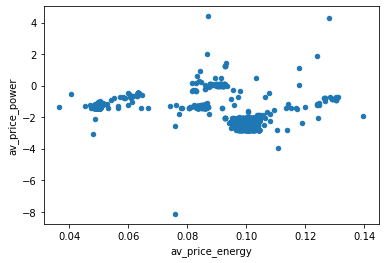

In [34]:
for x, y in mapping(xs, ys):
    normalize_data.groupby('churn').plot.scatter(x = x, y = y)

In [35]:
sc = StandardScaler()
standardize_data = sc.fit_transform(data_clean.drop(['date_modif_prod', 'date_renewal', 'churn'], 1))
standardize_data = pd.DataFrame(standardize_data, columns= data_clean.drop(['date_modif_prod', 'date_renewal', 'churn'], 1).columns, index = data_clean.index)
standardize_data['churn'] = data_clean.churn

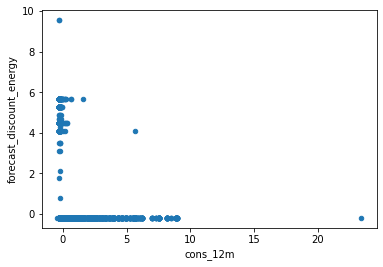

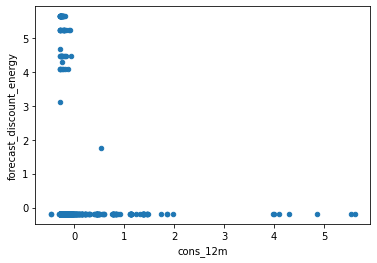

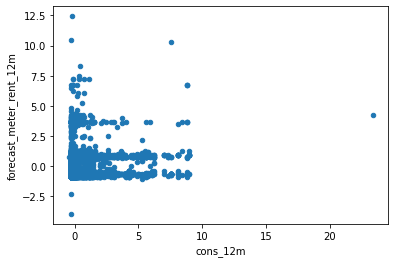

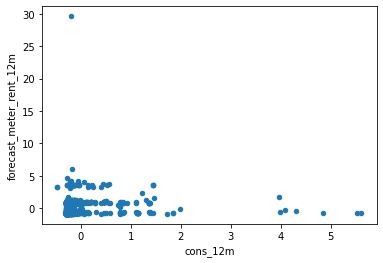

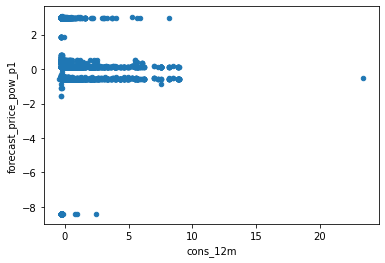

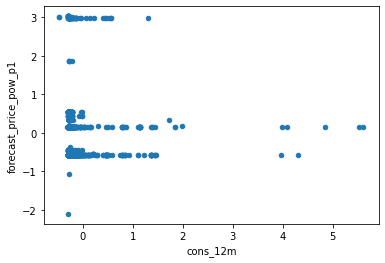

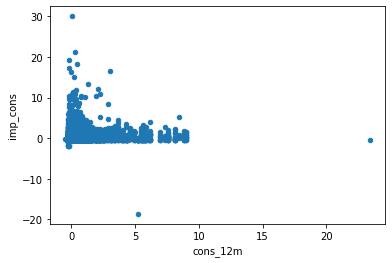

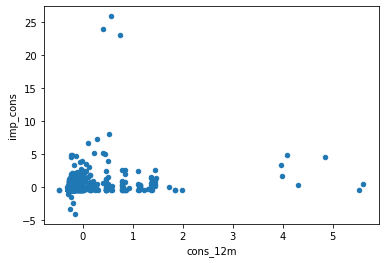

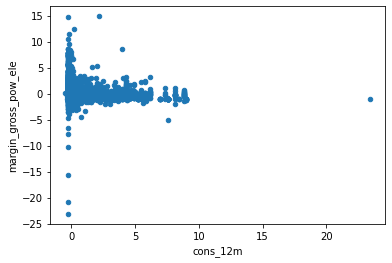

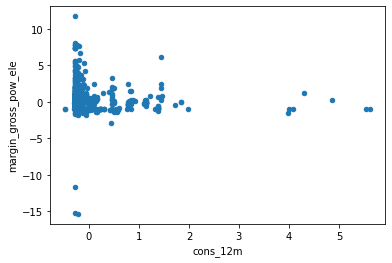

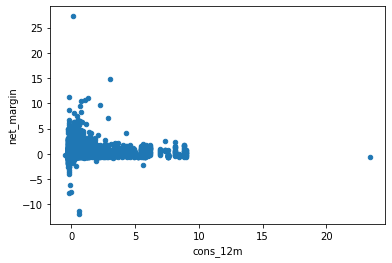

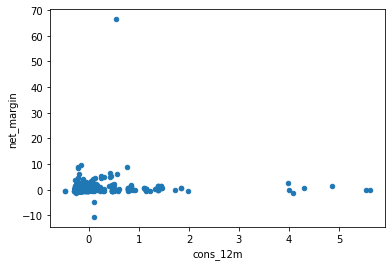

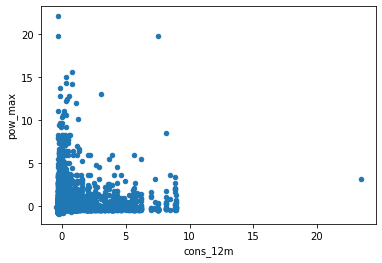

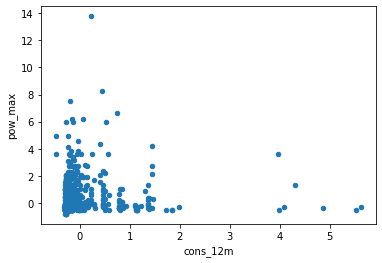

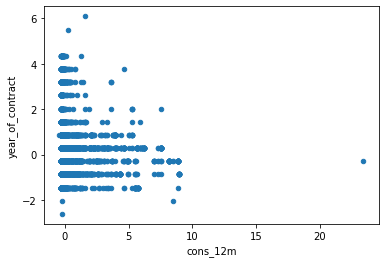

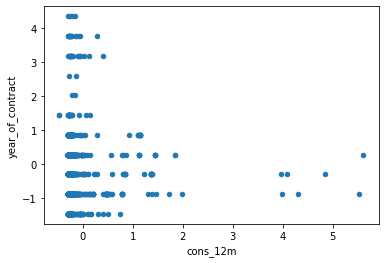

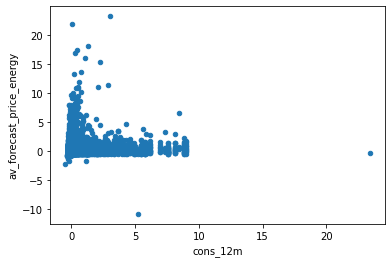

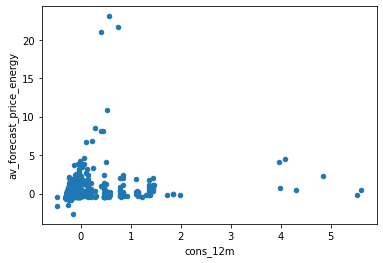

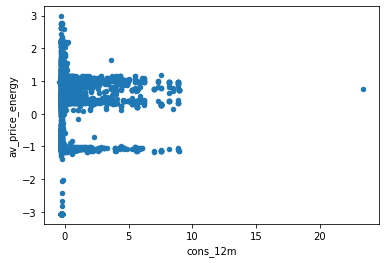

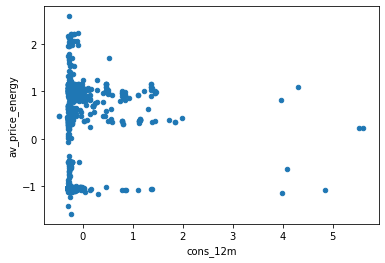

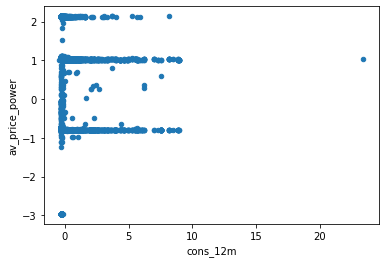

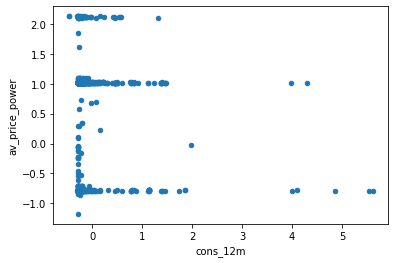

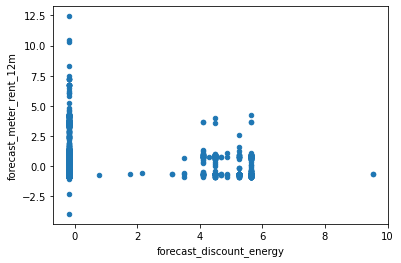

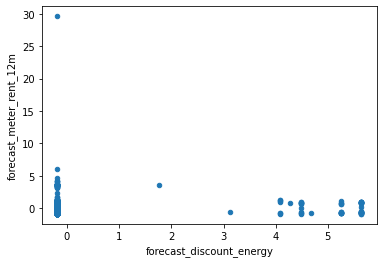

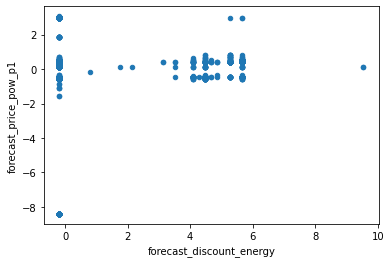

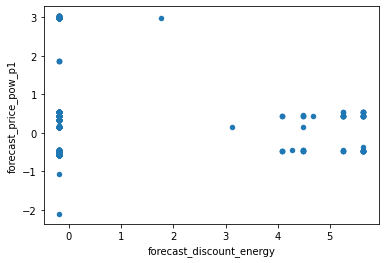

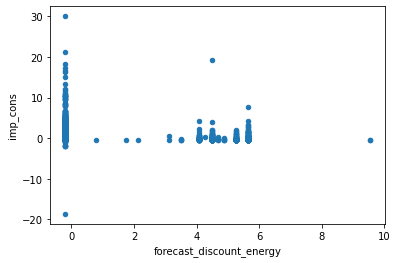

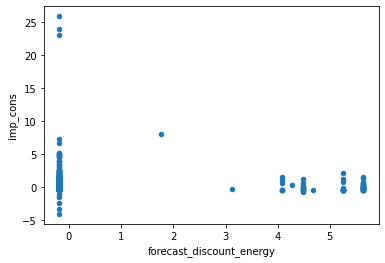

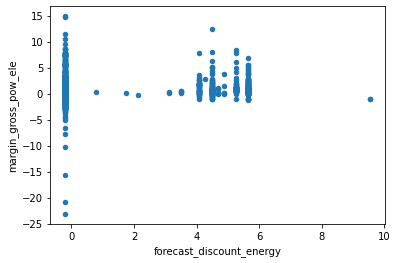

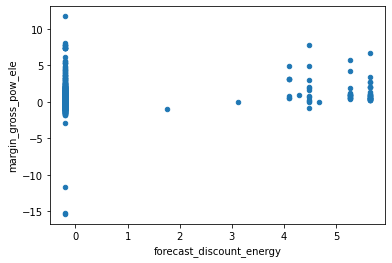

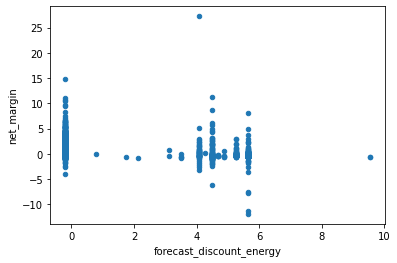

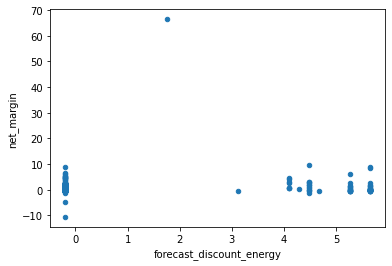

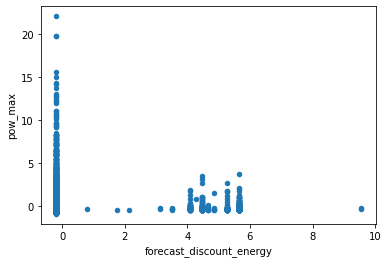

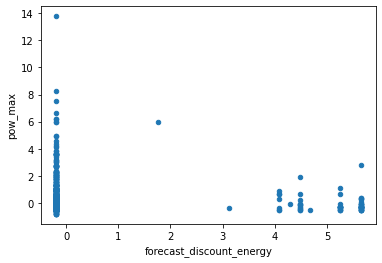

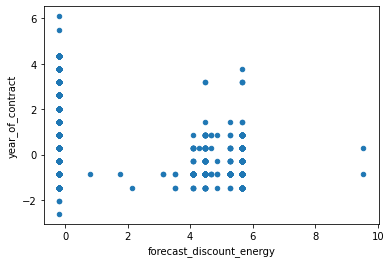

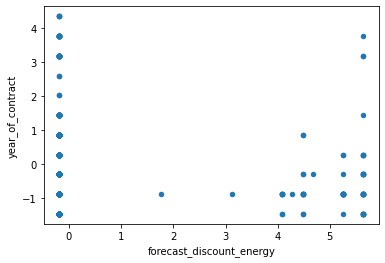

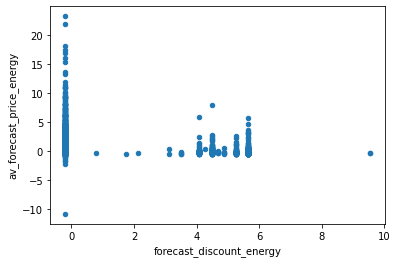

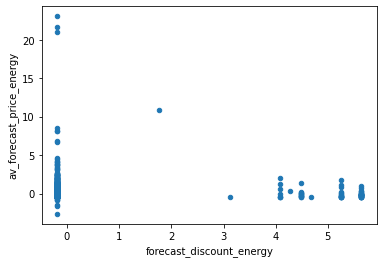

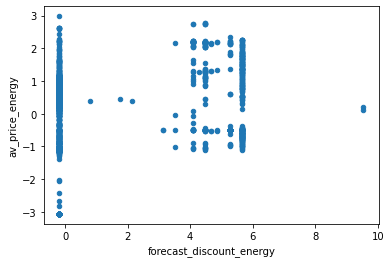

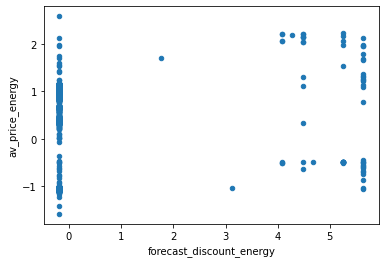

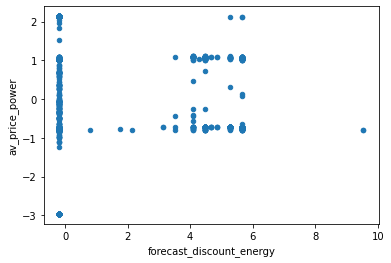

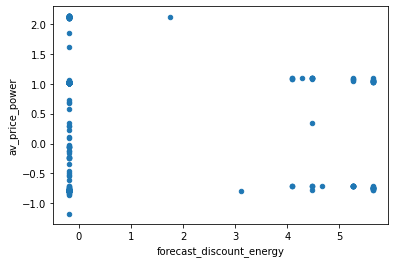

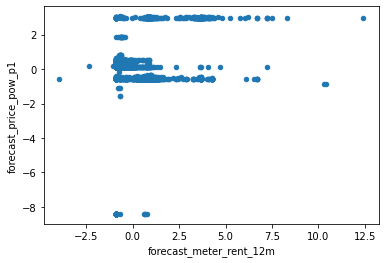

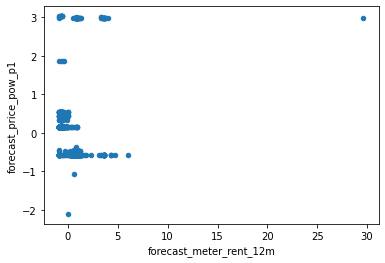

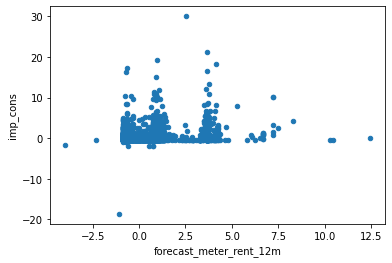

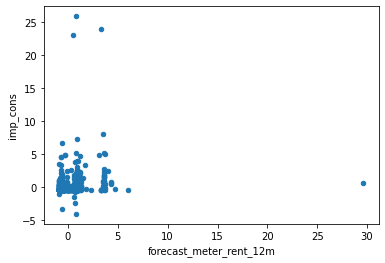

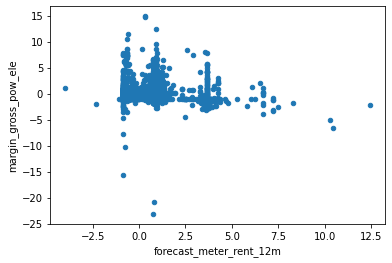

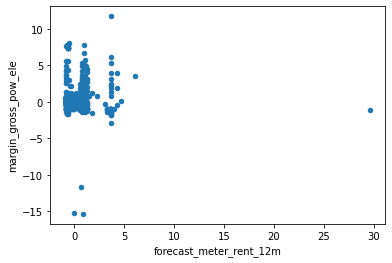

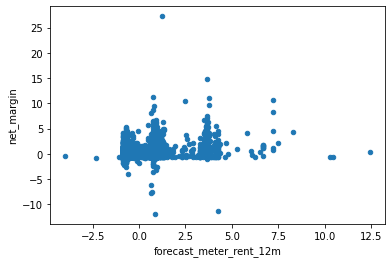

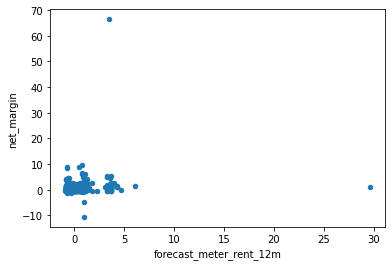

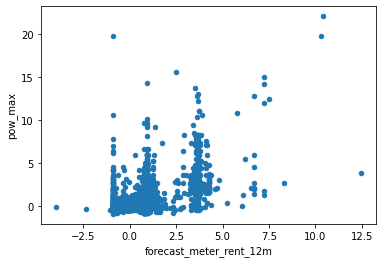

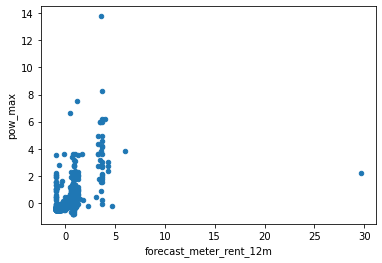

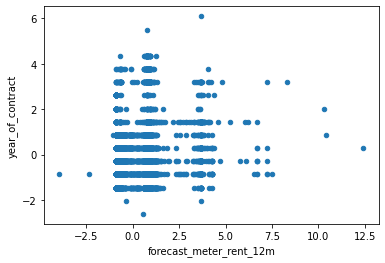

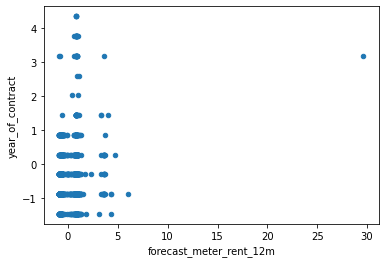

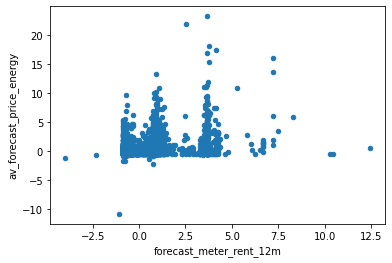

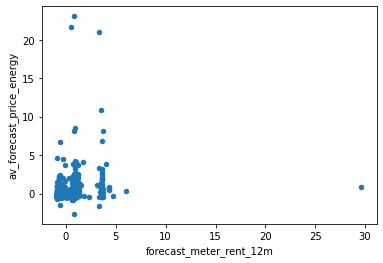

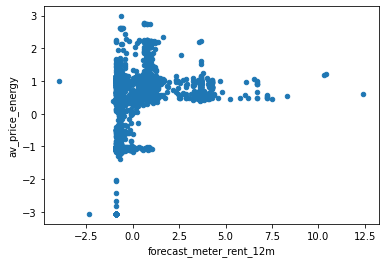

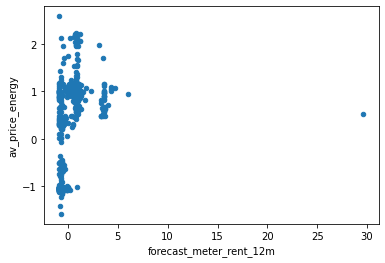

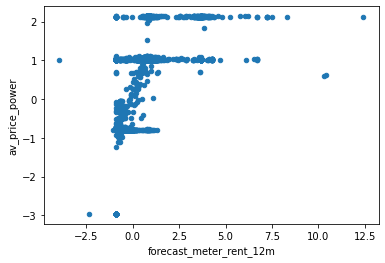

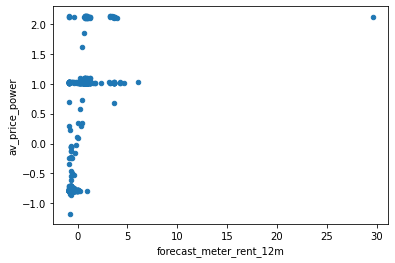

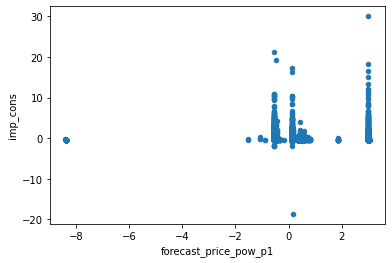

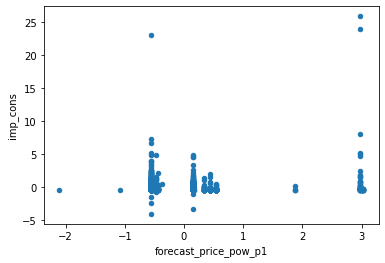

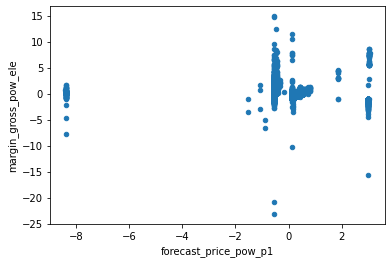

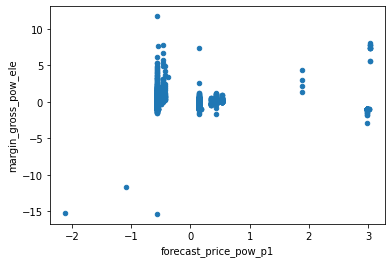

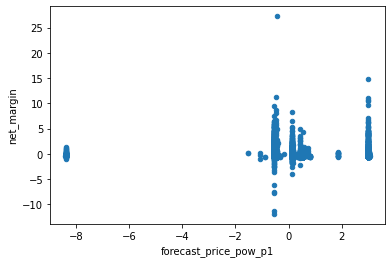

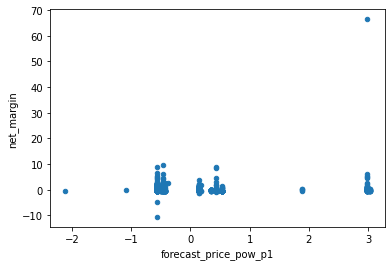

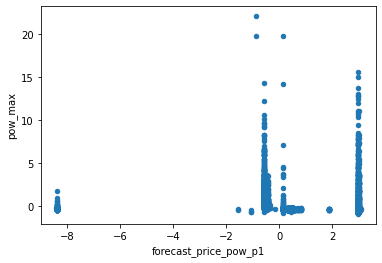

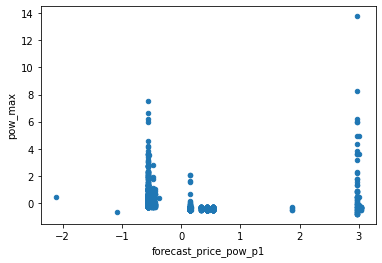

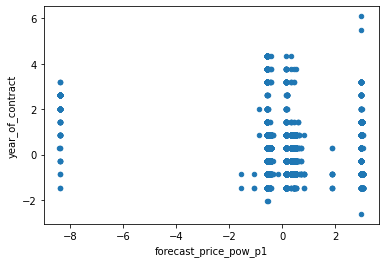

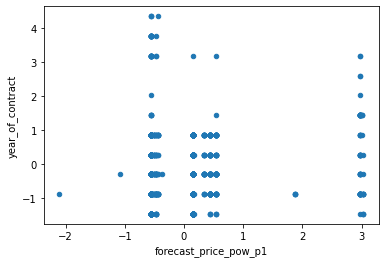

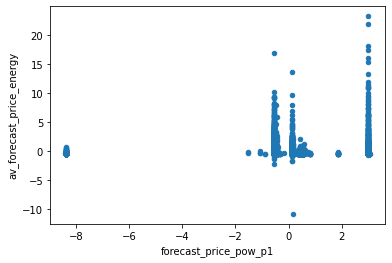

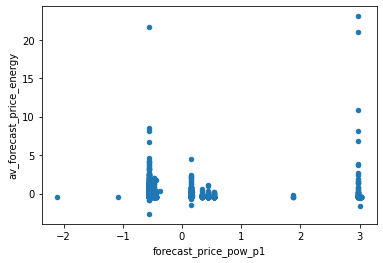

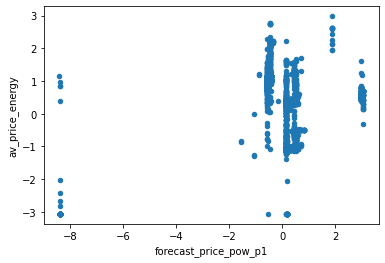

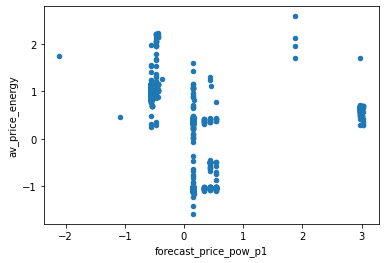

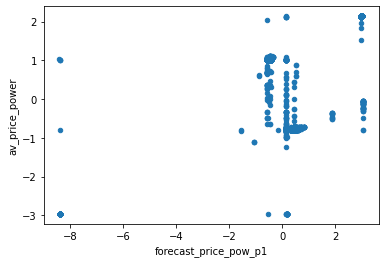

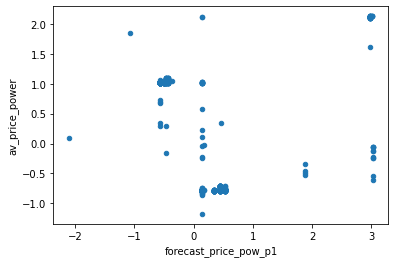

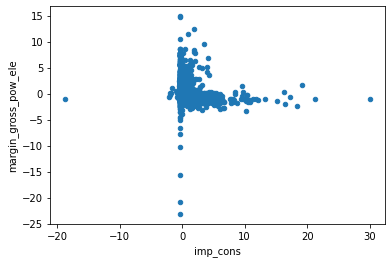

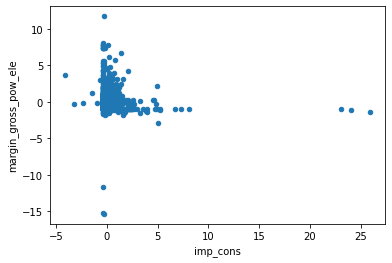

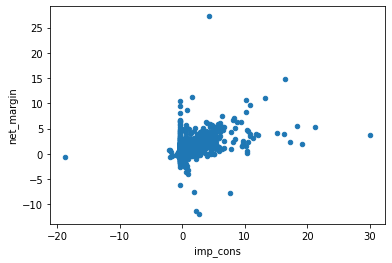

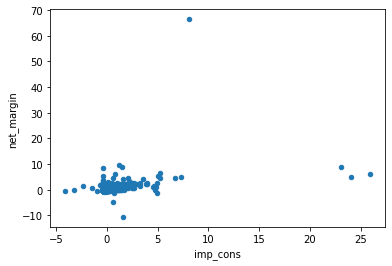

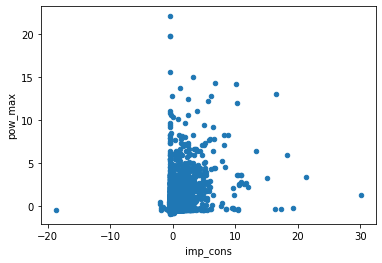

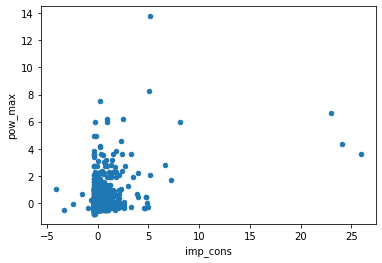

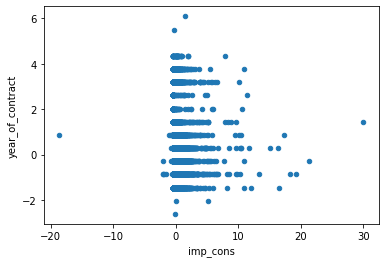

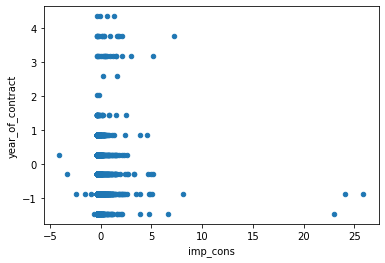

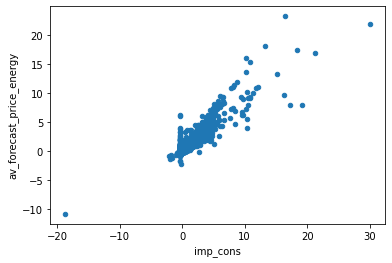

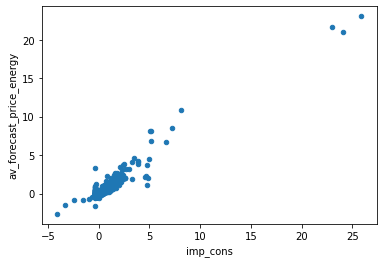

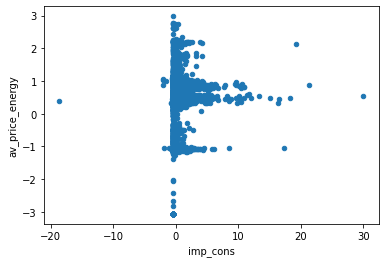

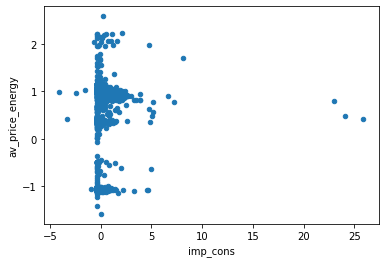

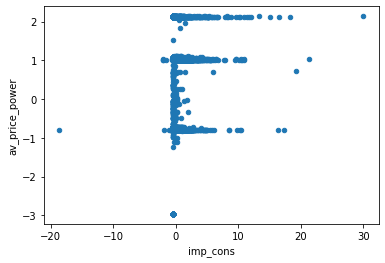

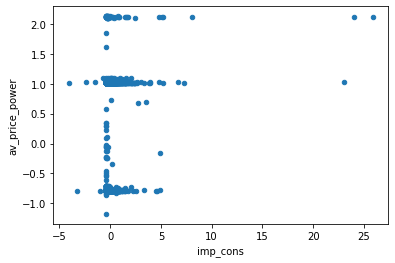

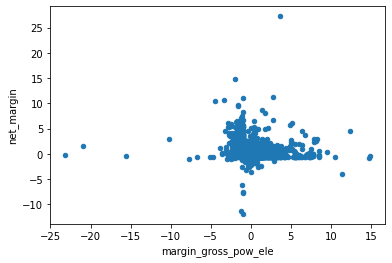

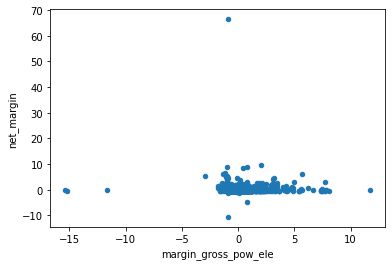

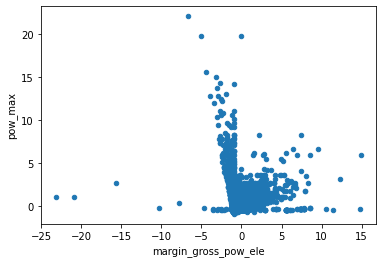

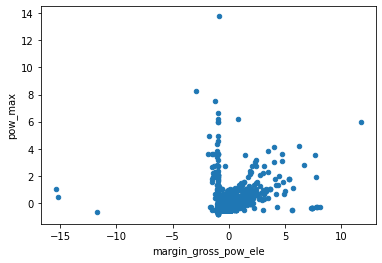

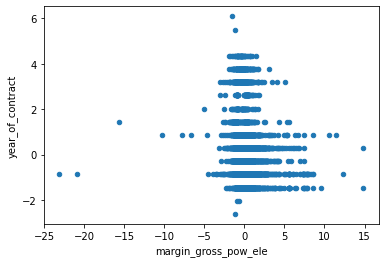

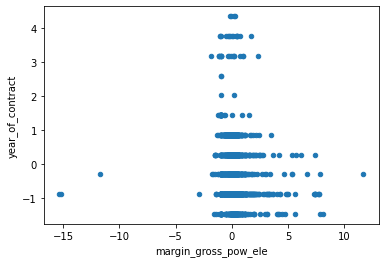

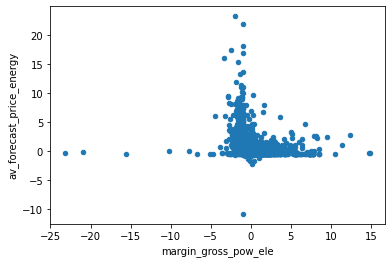

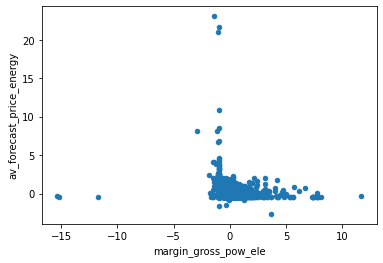

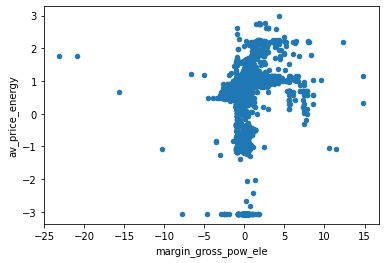

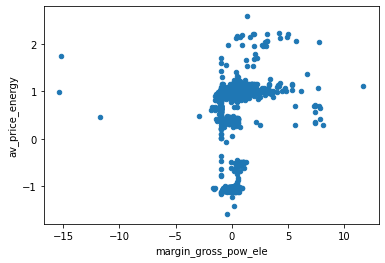

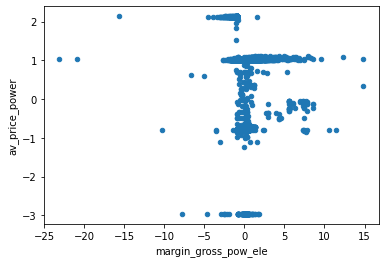

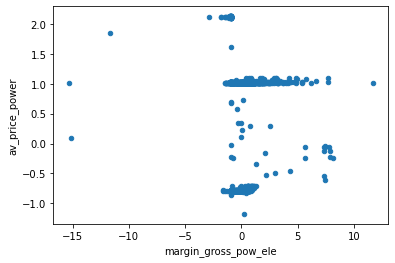

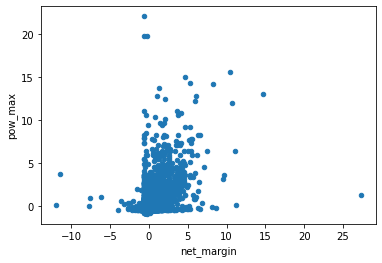

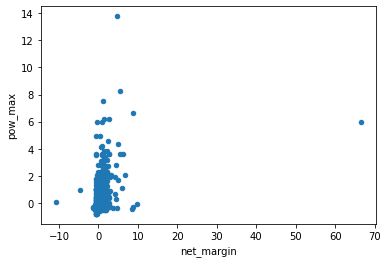

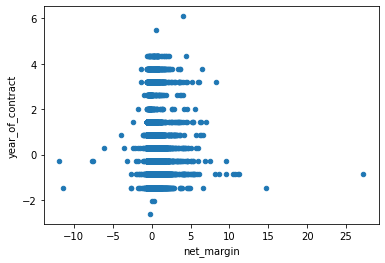

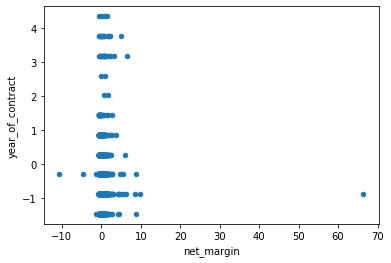

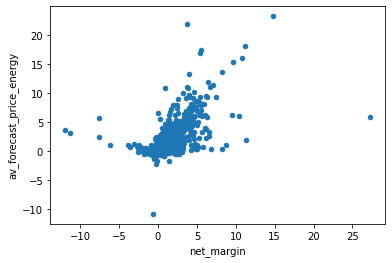

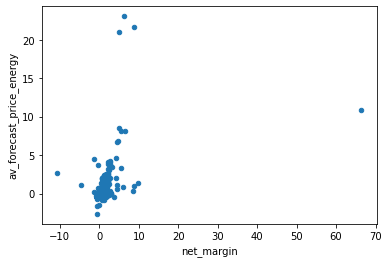

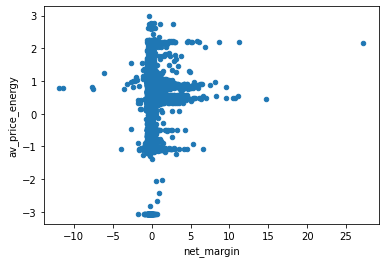

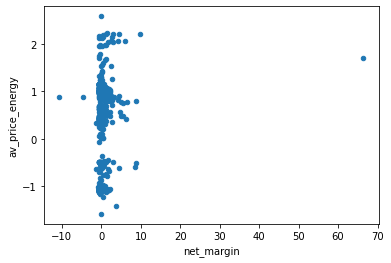

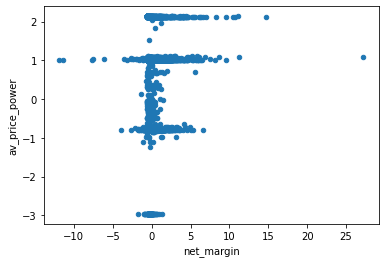

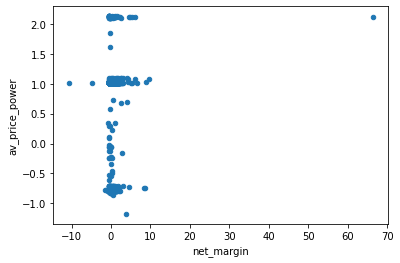

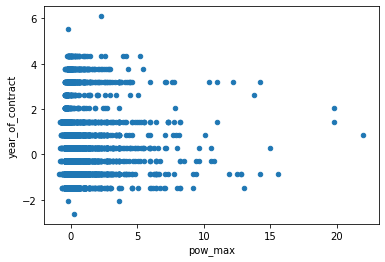

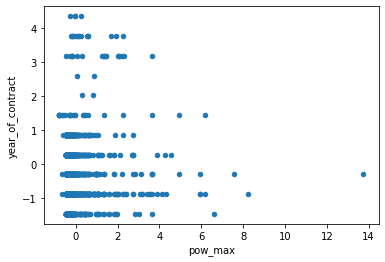

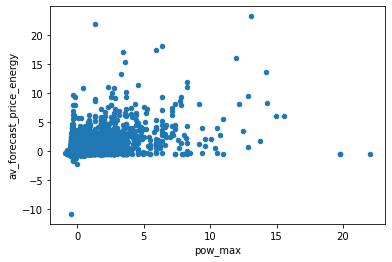

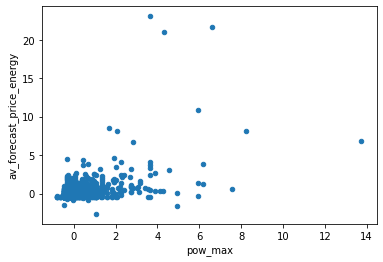

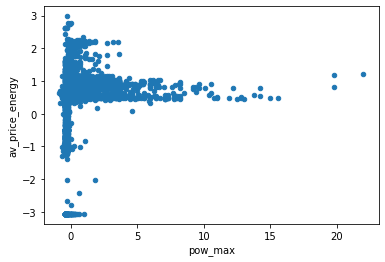

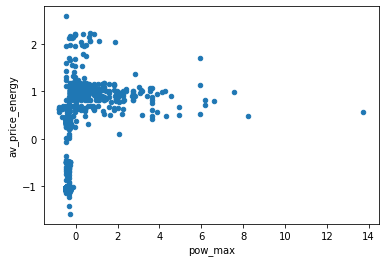

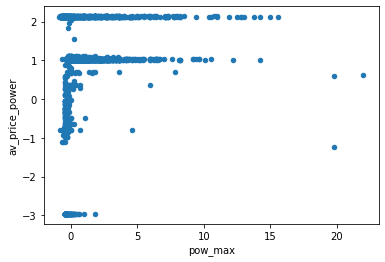

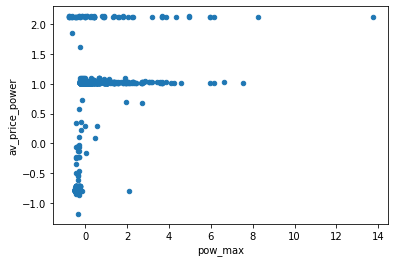

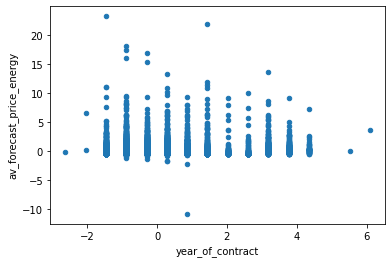

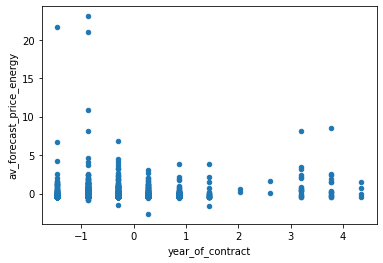

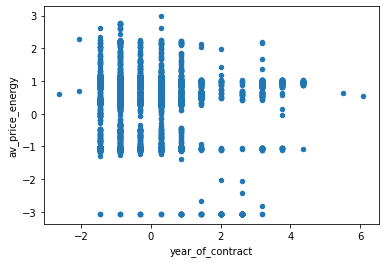

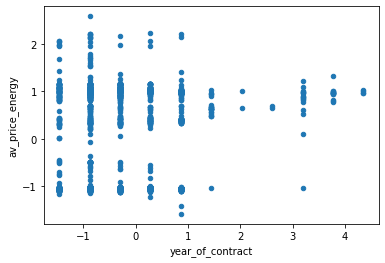

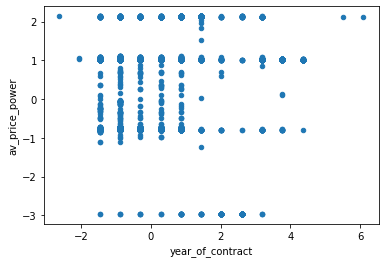

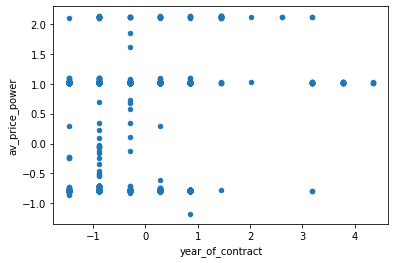

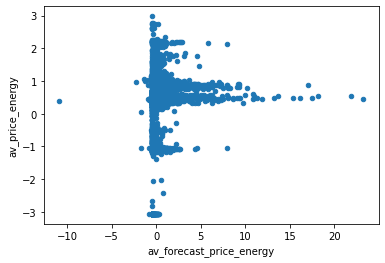

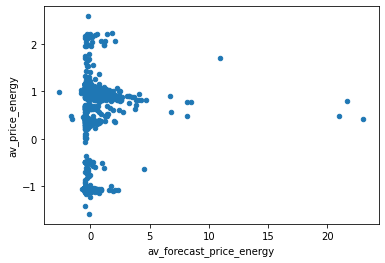

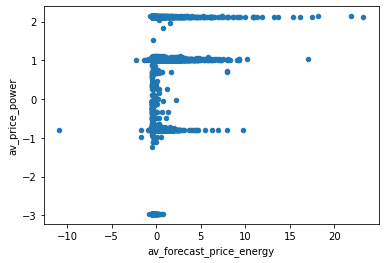

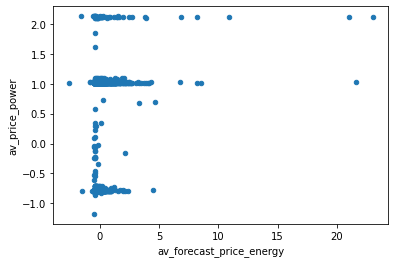

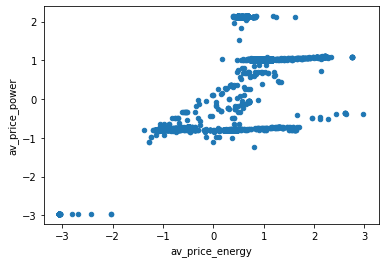

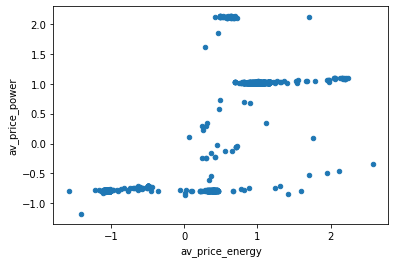

In [36]:
for x, y in mapping(xs, ys):
    standardize_data.groupby('churn').plot.scatter(x = x, y = y)

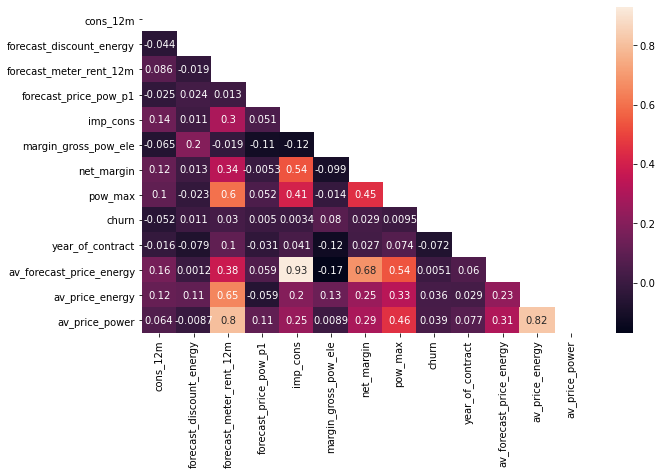

In [37]:
corr = data_clean.corr()
mask = np.tril(np.ones_like(corr, dtype=np.bool), k=-1)
new_data = corr.where(mask)
fig, ax = plt.subplots(1, 1, figsize = (10,6))
sns.heatmap(new_data, annot= True)

In [38]:
print(f'summary for column base on churn forecast_meter_rent_12m \n')
print('{}'.format(data_clean.groupby('churn')['forecast_meter_rent_12m'].describe()))

summary for column base on churn forecast_meter_rent_12m 

         count       mean        std     min    25%    50%     75%      max
churn                                                                      
0      14501.0  69.524497  76.940134 -242.96  16.22  19.38  131.42  1052.39
1       1595.0  77.450871  95.641798   -0.50  16.30  23.30  132.12  2411.69


In [43]:
print(data_clean.groupby('churn')['forecast_meter_rent_12m'].describe())
data_clean.head(3)

         count       mean        std     min    25%    50%     75%      max
churn                                                                      
0      14501.0  69.524497  76.940134 -242.96  16.22  19.38  131.42  1052.39
1       1595.0  77.450871  95.641798   -0.50  16.30  23.30  132.12  2411.69


cons_12m date_modif_prod date_renewal  \
id                                                                        
48ada52261e7cf58715202705a0451c9    309275      2012-11-07   2015-11-09   
24011ae4ebbe3035111d65fa7c15bc57         0      2015-11-01   2015-06-23   
d29c2c54acc38ff3c0614d0a653813dd      4660      2009-08-21   2015-08-31   

                                  forecast_discount_energy  \
id                                                           
48ada52261e7cf58715202705a0451c9                       0.0   
24011ae4ebbe3035111d65fa7c15bc57                       0.0   
d29c2c54acc38ff3c0614d0a653813dd                       0.0   

                                  forecast_meter_rent_12m  \
id                                                          
48ada52261e7cf58715202705a0451c9                   359.29   
24011ae4ebbe3035111d65fa7c15bc57                     1.78   
d29c2c54acc38ff3c0614d0a653813dd                    16.27   

                                  forecast_price_pow_p1  imp_cons  \
id                                                                  
48ada52261e7cf58715202705a0451c9              58.995952     831.8   
24011ae4ebbe3035111d65fa7c15bc57              40.606701       0.0   
d29c2c54acc38ff3c0614d0a653813dd              44.311378       0.0   

                                  margin_gross_pow_ele  net_margin  pow_max  \
id                                                                            
48ada52261e7cf58715202705a0451c9                -41.76     1732.36  180.000   
24011ae4ebbe3035111d65fa7c15bc57                 25.44      678.99   43.648   
d29c2c54acc38ff3c0614d0a653813dd                 16.38       18.89   13.800   

                                  churn  year_of_contract  \
id                                                          
48ada52261e7cf58715202705a0451c9      0                 4   
24011ae4ebbe3035111d65fa7c15bc57      1                 3   
d29c2c54acc38ff3c0614d0a653813dd      0                 7   

                                  av_forecast_price_energy  av_price_energy  \
id                                                                            
48ada52261e7cf58715202705a0451c9                 18272.650         0.087602   
24011ae4ebbe3035111d65fa7c15bc57                     0.000         0.099190   
d29c2c54acc38ff3c0614d0a653813dd                    94.975         0.049978   

                                  av_price_power  
id                                                
48ada52261e7cf58715202705a0451c9       34.550147  
24011ae4ebbe3035111d65fa7c15bc57       27.093347  
d29c2c54acc38ff3c0614d0a653813dd       14.771805

In [40]:
print(len(mapping(xs, ys)))
print(len([(x, y) for x in xs for y in ys if x != y]))

66
132
